In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

# Importing of data

In [2]:
raw_data = pd.read_csv('fraud_oracle.csv')
raw_data.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [4]:
raw_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [5]:
raw_data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


# Remove Outliers

In [6]:
# Remove Outlier for age is there is entries for Age = 0

raw_data = raw_data[raw_data['Age'] != 0]
raw_data.reset_index(inplace=True)
raw_data.drop("index", axis=1, inplace=True)

In [7]:
raw_data['FraudFound_P'].value_counts()

0    14208
1      892
Name: FraudFound_P, dtype: int64

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15100 non-null  object
 1   WeekOfMonth           15100 non-null  int64 
 2   DayOfWeek             15100 non-null  object
 3   Make                  15100 non-null  object
 4   AccidentArea          15100 non-null  object
 5   DayOfWeekClaimed      15100 non-null  object
 6   MonthClaimed          15100 non-null  object
 7   WeekOfMonthClaimed    15100 non-null  int64 
 8   Sex                   15100 non-null  object
 9   MaritalStatus         15100 non-null  object
 10  Age                   15100 non-null  int64 
 11  Fault                 15100 non-null  object
 12  PolicyType            15100 non-null  object
 13  VehicleCategory       15100 non-null  object
 14  VehiclePrice          15100 non-null  object
 15  FraudFound_P          15100 non-null

# Feature selection using f_classif and mutual_info_classif

In [9]:
raw_data['RepNumber'] = raw_data['RepNumber'].astype(str)
raw_data['WeekOfMonth'] = raw_data['WeekOfMonth'].astype(str)
raw_data['WeekOfMonthClaimed'] = raw_data['WeekOfMonthClaimed'].astype(str)

In [10]:
def split_columns_temp(df):
    cat_lst = []
    num_lst = []
    for name in df.columns:
        if name in ["FraudFound_P", "PolicyNumber","Days_Policy_Accident","PolicyType"]:
            continue
        if df[name].dtype != 'object':
            num_lst.append(name)
        else:
            cat_lst.append(name)

    return cat_lst, num_lst

In [11]:
categorical_lst, num_lst = split_columns_temp(raw_data)
print("Categorical Variables: ",categorical_lst)
print("Numerical Variables:",num_lst)

Categorical Variables:  ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'VehicleCategory', 'VehiclePrice', 'RepNumber', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']
Numerical Variables: ['Age', 'Deductible', 'DriverRating', 'Year']


In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

X, y = raw_data[num_lst], raw_data['FraudFound_P']

# Take top 50% for each classifier
proportion = 0.5
k = int(len(num_lst) * proportion)

# Populate features list
numerical_features = []
mutual_info = lambda x,y: mutual_info_classif(x, y, random_state=0)
mutual_info.__name__ = "mutual_info_classif"

for classif in [f_classif, mutual_info]:
    selector = SelectKBest(classif, k=k)
    selector.fit_transform(X, y)
    mask = selector.get_support()
    new_features = list(X.columns[mask])
    print(classif.__name__, new_features)
    numerical_features.extend(new_features)

# Retain unique elements
numerical_features = list(set(numerical_features))
numerical_features

f_classif ['Age', 'Deductible']
mutual_info_classif ['Age', 'Deductible']


['Deductible', 'Age']

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

# Encode categorical variables
label_encoder = LabelEncoder()
df = raw_data.copy()
X, y = df[categorical_lst], df['FraudFound_P']
for var in categorical_lst:
    X[var] = label_encoder.fit_transform(raw_data[var])

# We take top 50% for each classifier
proportion = 0.5
k = int(len(categorical_lst) * proportion)

# Populate features list
categorical_features = []
mutual_info = lambda x,y: mutual_info_classif(x, y, random_state=0)
mutual_info.__name__ = "mutual_info_classif"

for classif in [chi2, mutual_info]:
    selector = SelectKBest(classif, k=k)
    selector.fit_transform(X, y)
    mask = selector.get_support()
    new_features = list(X.columns[mask])
    print(classif.__name__, new_features)
    categorical_features.extend(new_features)

# Retain unique elements
categorical_features = list(set(categorical_features))
categorical_features

chi2 ['DayOfWeek', 'Make', 'MonthClaimed', 'Fault', 'VehicleCategory', 'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'AgentType', 'BasePolicy']


C:\Users\hein_\AppData\Local\Temp\ipykernel_13416\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var] = label_encoder.fit_transform(raw_data[var])
C:\Users\hein_\AppData\Local\Temp\ipykernel_13416\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var] = label_encoder.fit_transform(raw_data[var])
C:\Users\hein_\AppData\Local\Temp\ipykernel_13416\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

mutual_info_classif ['DayOfWeek', 'AccidentArea', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'Fault', 'VehicleCategory', 'Days_Policy_Claim', 'PastNumberOfClaims', 'NumberOfSuppliments', 'AddressChange_Claim', 'BasePolicy']


['AgeOfVehicle',
 'PastNumberOfClaims',
 'AgeOfPolicyHolder',
 'Sex',
 'MonthClaimed',
 'AccidentArea',
 'Days_Policy_Claim',
 'VehiclePrice',
 'BasePolicy',
 'WeekOfMonthClaimed',
 'Make',
 'AgentType',
 'NumberOfSuppliments',
 'PoliceReportFiled',
 'Fault',
 'DayOfWeek',
 'AddressChange_Claim',
 'VehicleCategory']

In [14]:
final_features = []

In [15]:
final_features.extend(numerical_features)
final_features.extend(categorical_features)
final_features.append('FraudFound_P')

In [16]:
final_features

['Deductible',
 'Age',
 'AgeOfVehicle',
 'PastNumberOfClaims',
 'AgeOfPolicyHolder',
 'Sex',
 'MonthClaimed',
 'AccidentArea',
 'Days_Policy_Claim',
 'VehiclePrice',
 'BasePolicy',
 'WeekOfMonthClaimed',
 'Make',
 'AgentType',
 'NumberOfSuppliments',
 'PoliceReportFiled',
 'Fault',
 'DayOfWeek',
 'AddressChange_Claim',
 'VehicleCategory',
 'FraudFound_P']

# After looking at the data, we have narrowed down to the following features to be included in our final dataframe.

In [17]:
final_df = raw_data[final_features].copy()

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Deductible           15100 non-null  int64 
 1   Age                  15100 non-null  int64 
 2   AgeOfVehicle         15100 non-null  object
 3   PastNumberOfClaims   15100 non-null  object
 4   AgeOfPolicyHolder    15100 non-null  object
 5   Sex                  15100 non-null  object
 6   MonthClaimed         15100 non-null  object
 7   AccidentArea         15100 non-null  object
 8   Days_Policy_Claim    15100 non-null  object
 9   VehiclePrice         15100 non-null  object
 10  BasePolicy           15100 non-null  object
 11  WeekOfMonthClaimed   15100 non-null  object
 12  Make                 15100 non-null  object
 13  AgentType            15100 non-null  object
 14  NumberOfSuppliments  15100 non-null  object
 15  PoliceReportFiled    15100 non-null  object
 16  Faul

### Binary Categorical Variables

In [19]:
for column in categorical_features:
    if len(final_df[column].unique()) == 2:
        print(column, final_df[column].unique())
        print()

Sex ['Female' 'Male']

AccidentArea ['Urban' 'Rural']

AgentType ['External' 'Internal']

PoliceReportFiled ['No' 'Yes']

Fault ['Policy Holder' 'Third Party']



### Multi-categorical Variables

In [20]:
for column in categorical_features:
    if len(final_df[column].unique()) > 2:
        print(column, final_df[column].unique())
        print()

AgeOfVehicle ['3 years' '6 years' '7 years' 'more than 7' '5 years' '4 years' '2 years'
 'new']

PastNumberOfClaims ['none' '1' '2 to 4' 'more than 4']

AgeOfPolicyHolder ['26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40'
 'over 65' '18 to 20']

MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Apr' 'Mar' 'Aug' 'May' 'Jun' 'Sep' 'Oct']

Days_Policy_Claim ['more than 30' '15 to 30' '8 to 15']

VehiclePrice ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']

BasePolicy ['Liability' 'Collision' 'All Perils']

WeekOfMonthClaimed ['1' '4' '2' '3' '5']

Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

NumberOfSuppliments ['none' 'more than 5' '3 to 5' '1 to 2']

DayOfWeek ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

AddressChange_Claim ['1 year' 'no change' '4 to 8 years' '2 

## Ordinal Features
1) AgeOfPolicyHolder
2) PastNumberOfClaims
3) VehiclePrice
4) NumberOfSuppliments
5) Days_Policy_Claim

In [21]:
ordinal_features = ['AgeOfPolicyHolder','PastNumberOfClaims',
                    'VehiclePrice','NumberOfSuppliments','Days_Policy_Claim']

# Feature Engineering and Preprocessing

In [22]:
def split_columns_by_Dtypes(df):
    binary_lst = []
    categorical_lst = []
    num_lst = []
    for name in df.columns:
        length = len(df[name].unique())
        if df[name].dtype != 'object':
            num_lst.append(name)
        elif length == 2:
            binary_lst.append(name)
        else:
            categorical_lst.append(name)
    return binary_lst, categorical_lst, num_lst

In [23]:
def convert_label(df, columns):
    for name in columns:
        encoder = LabelEncoder()
        df[name] = encoder.fit_transform(df[name])
    return df

In [24]:
def oneHotEncode(df, lst):
    ohe = OneHotEncoder()
    output_array = ohe.fit_transform(df[lst]).toarray()
    df[ohe.get_feature_names_out()] = output_array
    return df

In [25]:
def scaler(df,columns):
    age = []
    deductible = []
    scaler = MinMaxScaler()
    output = scaler.fit_transform(df[columns])
    for row in output:
        age.append(row[0])
        deductible.append(row[1])
    df['Age'] = age
    df['Deductible'] = deductible
    return df

In [26]:
def convert_ordinal(df, name, mapping):
    encoder = LabelEncoder()
    encoder.classes_ = [str(category) for category, _ in sorted(mapping.items(), key=lambda x: x[1])]
    df[name] = encoder.fit_transform(df[name])
    return df

In [27]:
def count_encoder(df, columns):
    for name in columns:
        encoder = ce.CountEncoder(cols=name, normalize=True)
        df[name] = encoder.fit_transform(df[name])
    return df

In [28]:
binary_lst, categorical_lst, num_lst = split_columns_by_Dtypes(final_df)

In [29]:
multicat_features = [feature for feature in categorical_lst if feature not in ordinal_features]
multicat_features.remove('MonthClaimed')
multicat_features.remove('Make')

print("Binary Variable:",binary_lst)
print("Multi-Categorical Variable:",multicat_features)
print("Numerical:",num_lst)
print("Ordinal:", ordinal_features)
print("CountEncoder", ['Make','MonthClaimed'])

Binary Variable: ['Sex', 'AccidentArea', 'AgentType', 'PoliceReportFiled', 'Fault']
Multi-Categorical Variable: ['AgeOfVehicle', 'BasePolicy', 'WeekOfMonthClaimed', 'DayOfWeek', 'AddressChange_Claim', 'VehicleCategory']
Numerical: ['Deductible', 'Age', 'FraudFound_P']
Ordinal: ['AgeOfPolicyHolder', 'PastNumberOfClaims', 'VehiclePrice', 'NumberOfSuppliments', 'Days_Policy_Claim']
CountEncoder ['Make', 'MonthClaimed']


# Encoding all the categorical variables using helper functions

## Label Encoding for Binary Features

In [30]:
convert_label(final_df, binary_lst)

,Deductible,Age,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,Sex,MonthClaimed,AccidentArea,Days_Policy_Claim,VehiclePrice,...,WeekOfMonthClaimed,Make,AgentType,NumberOfSuppliments,PoliceReportFiled,Fault,DayOfWeek,AddressChange_Claim,VehicleCategory,FraudFound_P
0,300,21,3 years,none,26 to 30,0,Jan,1,more than 30,more than 69000,...,1,Honda,0,none,0,0,Wednesday,1 year,Sport,0
1,400,34,6 years,none,31 to 35,1,Jan,1,more than 30,more than 69000,...,4,Honda,0,none,1,0,Wednesday,no change,Sport,0
2,400,47,7 years,1,41 to 50,1,Nov,1,more than 30,more than 69000,...,2,Honda,0,none,0,0,Friday,no change,Sport,0
3,400,65,more than 7,1,51 to 65,1,Jul,0,more than 30,20000 to 29000,...,1,Toyota,0,more than 5,1,1,Saturday,no change,Sport,0
4,400,27,5 years,none,31 to 35,0,Feb,1,more than 30,more than 69000,...,2,Honda,0,none,0,1,Monday,no change,Sport,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,400,35,6 years,2 to 4,31 to 35,1,Nov,1,more than 30,20000 to 29000,...,5,Toyota,0,none,0,0,Friday,no change,Sedan,1
15096,400,30,6 years,more than 4,31 to 35,1,Dec,1,more than 30,30000 to 39000,...,1,Pontiac,0,more than 5,0,0,Thursday,no change,Sport,0
15097,400,24,5 years,more than 4,26 to 30,1,Dec,0,more than 30,20000 to 29000,...,1,Toyota,0,1 to 2,0,0,Thursday,no change,Sedan,1
15098,400,34,2 years,none,31 to 35,0,Dec,1,more than 30,20000 to 29000,...,2,Toyota,0,more than 5,0,1,Monday,no change,Sedan,0


## One Hot Encoding

In [31]:
oneHotEncode(final_df,multicat_features)

,Deductible,Age,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,Sex,MonthClaimed,AccidentArea,Days_Policy_Claim,VehiclePrice,...,DayOfWeek_Tuesday,DayOfWeek_Wednesday,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility
0,300,21,3 years,none,26 to 30,0,Jan,1,more than 30,more than 69000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,400,34,6 years,none,31 to 35,1,Jan,1,more than 30,more than 69000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,400,47,7 years,1,41 to 50,1,Nov,1,more than 30,more than 69000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,400,65,more than 7,1,51 to 65,1,Jul,0,more than 30,20000 to 29000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,400,27,5 years,none,31 to 35,0,Feb,1,more than 30,more than 69000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,400,35,6 years,2 to 4,31 to 35,1,Nov,1,more than 30,20000 to 29000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
15096,400,30,6 years,more than 4,31 to 35,1,Dec,1,more than 30,30000 to 39000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15097,400,24,5 years,more than 4,26 to 30,1,Dec,0,more than 30,20000 to 29000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
15098,400,34,2 years,none,31 to 35,0,Dec,1,more than 30,20000 to 29000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Scaling of Numberical Features

In [32]:
# We do not want to scale the label
scaler(final_df, ['Age','Deductible'])

,Deductible,Age,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,Sex,MonthClaimed,AccidentArea,Days_Policy_Claim,VehiclePrice,...,DayOfWeek_Tuesday,DayOfWeek_Wednesday,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility
0,0.00,0.078125,3 years,none,26 to 30,0,Jan,1,more than 30,more than 69000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.25,0.281250,6 years,none,31 to 35,1,Jan,1,more than 30,more than 69000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.25,0.484375,7 years,1,41 to 50,1,Nov,1,more than 30,more than 69000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.25,0.765625,more than 7,1,51 to 65,1,Jul,0,more than 30,20000 to 29000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.25,0.171875,5 years,none,31 to 35,0,Feb,1,more than 30,more than 69000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,0.25,0.296875,6 years,2 to 4,31 to 35,1,Nov,1,more than 30,20000 to 29000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
15096,0.25,0.218750,6 years,more than 4,31 to 35,1,Dec,1,more than 30,30000 to 39000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15097,0.25,0.125000,5 years,more than 4,26 to 30,1,Dec,0,more than 30,20000 to 29000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
15098,0.25,0.281250,2 years,none,31 to 35,0,Dec,1,more than 30,20000 to 29000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Label Encoding for Ordinal Features

In [33]:
ordinal_features

['AgeOfPolicyHolder',
 'PastNumberOfClaims',
 'VehiclePrice',
 'NumberOfSuppliments',
 'Days_Policy_Claim']

In [34]:
age_policy_holder_mapping = {'26 to 30': 2, '31 to 35':3, '41 to 50': 5, '51 to 65': 6, '21 to 25': 1, '36 to 40':4, 'over 65': 7, '18 to 20': 0}
past_number_of_claims_mapping = {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3}
vehicle_price_mapping = {'more than 69000': 5, '20000 to 29000': 1, '30000 to 39000': 2, 'less than 20000': 0, '40000 to 59000': 3, '60000 to 69000': 4}
NoS_mapping = {'none':0, '1 to 2':1, '3 to 5':2, 'more than 5':3}
DPC_mapping = {'none':0, '8 to 15':1, '15 to 30':2, 'more than 30':3}

mapper_lst = [age_policy_holder_mapping, past_number_of_claims_mapping, vehicle_price_mapping, NoS_mapping,DPC_mapping]

mapper_lst

[{'26 to 30': 2,
  '31 to 35': 3,
  '41 to 50': 5,
  '51 to 65': 6,
  '21 to 25': 1,
  '36 to 40': 4,
  'over 65': 7,
  '18 to 20': 0},
 {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3},
 {'more than 69000': 5,
  '20000 to 29000': 1,
  '30000 to 39000': 2,
  'less than 20000': 0,
  '40000 to 59000': 3,
  '60000 to 69000': 4},
 {'none': 0, '1 to 2': 1, '3 to 5': 2, 'more than 5': 3},
 {'none': 0, '8 to 15': 1, '15 to 30': 2, 'more than 30': 3}]

In [35]:
for i in range(0,5):
    convert_ordinal(final_df, ordinal_features[i], mapper_lst[i]);

## Frequency Encoding for Categorical Variables with more than 10 categories

In [36]:
count_encoder(final_df, ['Make','MonthClaimed'])

,Deductible,Age,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,Sex,MonthClaimed,AccidentArea,Days_Policy_Claim,VehiclePrice,...,DayOfWeek_Tuesday,DayOfWeek_Wednesday,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility
0,0.00,0.078125,3 years,3,2,0,0.091060,1,2,5,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.25,0.281250,6 years,3,3,1,0.091060,1,2,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.25,0.484375,7 years,0,5,1,0.084503,1,2,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.25,0.765625,more than 7,0,6,1,0.080530,0,2,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.25,0.171875,5 years,3,3,0,0.082119,1,2,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,0.25,0.296875,6 years,1,3,1,0.084503,1,2,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
15096,0.25,0.218750,6 years,2,3,1,0.075430,1,2,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15097,0.25,0.125000,5 years,2,2,1,0.075430,0,2,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
15098,0.25,0.281250,2 years,3,3,0,0.075430,1,2,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Deductible                          15100 non-null  float64
 1   Age                                 15100 non-null  float64
 2   AgeOfVehicle                        15100 non-null  object 
 3   PastNumberOfClaims                  15100 non-null  int32  
 4   AgeOfPolicyHolder                   15100 non-null  int32  
 5   Sex                                 15100 non-null  int32  
 6   MonthClaimed                        15100 non-null  float64
 7   AccidentArea                        15100 non-null  int32  
 8   Days_Policy_Claim                   15100 non-null  int32  
 9   VehiclePrice                        15100 non-null  int32  
 10  BasePolicy                          15100 non-null  object 
 11  WeekOfMonthClaimed                  15100

In [38]:
final_df.head()

,Deductible,Age,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,Sex,MonthClaimed,AccidentArea,Days_Policy_Claim,VehiclePrice,...,DayOfWeek_Tuesday,DayOfWeek_Wednesday,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility
0,0.00,0.078125,3 years,3,2,0,0.091060,1,2,5,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.25,0.281250,6 years,3,3,1,0.091060,1,2,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.25,0.484375,7 years,0,5,1,0.084503,1,2,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.25,0.765625,more than 7,0,6,1,0.080530,0,2,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.25,0.171875,5 years,3,3,0,0.082119,1,2,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Clean up the dataset to remove unnecessary columns

In [39]:
final_df.drop(multicat_features, axis=1, inplace=True)

In [40]:
final_df.reset_index(inplace = True)
final_df.drop('index', axis=1, inplace=True)

In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Deductible                          15100 non-null  float64
 1   Age                                 15100 non-null  float64
 2   PastNumberOfClaims                  15100 non-null  int32  
 3   AgeOfPolicyHolder                   15100 non-null  int32  
 4   Sex                                 15100 non-null  int32  
 5   MonthClaimed                        15100 non-null  float64
 6   AccidentArea                        15100 non-null  int32  
 7   Days_Policy_Claim                   15100 non-null  int32  
 8   VehiclePrice                        15100 non-null  int32  
 9   Make                                15100 non-null  float64
 10  AgentType                           15100 non-null  int32  
 11  NumberOfSuppliments                 15100

In [42]:
final_df.head()

,Deductible,Age,PastNumberOfClaims,AgeOfPolicyHolder,Sex,MonthClaimed,AccidentArea,Days_Policy_Claim,VehiclePrice,Make,...,DayOfWeek_Tuesday,DayOfWeek_Wednesday,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility
0,0.00,0.078125,3,2,0,0.091060,1,2,5,0.164371,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.25,0.281250,3,3,1,0.091060,1,2,5,0.164371,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.25,0.484375,0,5,1,0.084503,1,2,5,0.164371,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.25,0.765625,0,6,1,0.080530,0,2,0,0.206689,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.25,0.171875,3,3,0,0.082119,1,2,5,0.164371,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Train Test split

In [43]:
x_var = [i for i in list(final_df.columns) if i != 'FraudFound_P']
y_var = ['FraudFound_P']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X, X_test, y, y_test = train_test_split(final_df[x_var], final_df[y_var],
                                        test_size=0.1, random_state=19,
                                        stratify=final_df[y_var])

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=19, stratify=y)

In [47]:
X_train.shape

(10872, 45)

In [48]:
X_val.shape

(2718, 45)

In [49]:
X_test.shape

(1510, 45)

In [50]:
y_train['FraudFound_P'].sum()

642

# Machine Learning Model Training

In [51]:
# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from copy import deepcopy

# machine learning models
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# for evaluation of machine learning models
from sklearn.metrics import accuracy_score, recall_score, fbeta_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import geometric_mean_score

import warnings
warnings.filterwarnings('ignore')

In [52]:
def evaluate_results(y_test, y_pred):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    # Create confusion matrix of validation data
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix: \n", cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))
    print("\n")

    # Evaluation Statistics
    # Performance of decision tree model on validation data
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F2: ", fbeta_score(y_test, y_pred, beta=2))
    print("G-Mean: ", geometric_mean_score(y_test, y_pred))

In [53]:
def train_model(X_train, X_test, y_train, y_test, classifier):

    # build model on train set
    C = classifier
    C.fit(X_train, y_train)

    # predict on validation set
    y_preds = C.predict(X_test)

    # Evaluate results
    evaluate_results(y_test, y_preds)

# Training model without handling imbalance data

## Logistic Regression

In [54]:
LR = LogisticRegression(random_state=19)

In [55]:
train_model(X_train, X_val, y_train, y_val, LR)

Confusion Matrix: 
 [[2554    3]
 [ 161    0]]
TN: 2554, FP: 3, FN: 161, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


## Linear SVC

In [56]:
svc = LinearSVC(random_state=19)

In [57]:
train_model(X_train, X_val, y_train, y_val, svc)

Confusion Matrix: 
 [[2556    1]
 [ 160    1]]
TN: 2556, FP: 1, FN: 160, TP: 1


Precision:  0.5
Recall:  0.006211180124223602
F2:  0.007739938080495355
G-Mean:  0.07879562827593363


## XBG Classifier

In [58]:
xgb = XGBClassifier(random_state=19)

In [59]:
train_model(X_train, X_val, y_train, y_val, xgb)

Confusion Matrix: 
 [[2543   14]
 [ 150   11]]
TN: 2543, FP: 14, FN: 150, TP: 11


Precision:  0.44
Recall:  0.06832298136645963
F2:  0.0822122571001495
G-Mean:  0.2606701012534579


## Random Forest

In [60]:
rf = RandomForestClassifier(random_state=19)

In [61]:
train_model(X_train, X_val, y_train, y_val, rf)

Confusion Matrix: 
 [[2556    1]
 [ 155    6]]
TN: 2556, FP: 1, FN: 155, TP: 6


Precision:  0.8571428571428571
Recall:  0.037267080745341616
F2:  0.04608294930875577
G-Mean:  0.19300908323805555


## AdaBoost

In [62]:
adb = AdaBoostClassifier(random_state=19)

In [63]:
train_model(X_train, X_val, y_train, y_val, adb)

Confusion Matrix: 
 [[2536   21]
 [ 159    2]]
TN: 2536, FP: 21, FN: 159, TP: 2


Precision:  0.08695652173913043
Recall:  0.012422360248447204
F2:  0.014992503748125937
G-Mean:  0.11099702031054069


## Voting Classifier

In [64]:
vc = VotingClassifier(
    estimators=[('XGB',xgb),('LR',LR), ('SVC', svc), ('RF', rf), ('Ada', adb)],
    voting='hard'
)

In [65]:
train_model(X_train, X_val, y_train, y_val, vc)

Confusion Matrix: 
 [[2557    0]
 [ 161    0]]
TN: 2557, FP: 0, FN: 161, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


In [66]:
vc = VotingClassifier(
    estimators=[('XGB',xgb), ('RF', rf), ('Ada', adb)],
    voting='hard'
)

In [67]:
train_model(X_train, X_val, y_train, y_val, vc)

Confusion Matrix: 
 [[2556    1]
 [ 155    6]]
TN: 2556, FP: 1, FN: 155, TP: 6


Precision:  0.8571428571428571
Recall:  0.037267080745341616
F2:  0.04608294930875577
G-Mean:  0.19300908323805555


# Imbalance Data Handling

In [68]:
# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

In [69]:
def get_sample_SMOTE(X_train, y_train, sampling):
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)
    return X_res_smote, y_res_smote

In [70]:
def get_sample_SMOTEENN(X_train, y_train, neighbour, sampling):
    ennObj = EditedNearestNeighbours(n_neighbors=neighbour)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)
    return X_res_smoteENN, y_res_smoteENN

In [71]:
def train_data_with_SMOTE_val(X_train, X_val, y_train, y_val, sampling, classifier):

    X_test = X_val
    y_test = y_val

    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smote, y_res_smote)

    # predict on validation set
    y_preds = clf.predict(X_test)


    # Evaluate results
    evaluate_results(y_test, y_preds)
    Precision = precision_score(y_test, y_preds)
    F2 = fbeta_score(y_test, y_preds, beta=2)
    Recall = recall_score(y_test, y_preds)
    Gmean = geometric_mean_score(y_test, y_preds)
    return Precision, Recall, F2, Gmean

In [72]:
def train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val, neighbour, sampling, classifier):

    ennObj = EditedNearestNeighbours(n_neighbors=neighbour)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smoteENN, y_res_smoteENN)

    # predict on validation set
    y_preds = clf.predict(X_val)

    # Evaluate results
    evaluate_results(y_val, y_preds)
    Precision = precision_score(y_val, y_preds)
    F2 = fbeta_score(y_val, y_preds, beta=2)
    Recall = recall_score(y_val, y_preds)
    Gmean = geometric_mean_score(y_val, y_preds)
    return Precision, Recall, F2, Gmean

In [73]:
def train_data_with_weights_val(X_train, X_val, y_train, y_val, classifier):

    X_test = X_val
    y_test = y_val

    clf = classifier
    clf.fit(X_train, y_train)

    # predict on validation set
    y_preds = clf.predict(X_test)

    # Evaluate results
    evaluate_results(y_test, y_preds)
    Precision = precision_score(y_test, y_preds)
    F2 = fbeta_score(y_test, y_preds, beta=2)
    Recall = recall_score(y_test, y_preds)
    Gmean = geometric_mean_score(y_test, y_preds)
    return Precision, Recall, F2, Gmean

In [74]:
def get_performance_visualisation(method, X_train, X_val, y_train, y_val, classifier, neighbour=5):
    Precision_lst, F2_lst, Recall_lst, resampling, Gmean_lst = [], [], [], [], []
    if method == "SMOTEENN":
        resampling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
        for sampling in resampling:
            print("Sampling Size:", sampling)
            print()
            Precision, Recall, F2, Gmean = train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val, neighbour, sampling, classifier)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
        df = pd.DataFrame(columns=['Precision','F2 Score','Recall', 'G-mean'])
        df['Precision'] = Precision_lst
        df['F2 Score'] = F2_lst
        df['Recall'] = Recall_lst
        df['G-mean'] = Gmean_lst
        df['Sampling Size'] = resampling
        df.plot(x='Sampling Size',
            y=['Precision','F2 Score','Recall', 'G-mean'],
            title= 'Resampling Performance',
               ylim=(0,1))

    elif method == "SMOTE":
        resampling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
        for sampling in resampling:
            print("Sampling Size:", sampling)
            print()
            Precision, Recall, F2, Gmean = train_data_with_SMOTE_val(X_train, X_val, y_train, y_val, sampling, classifier)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
        df = pd.DataFrame(columns=['Precision','F2 Score','Recall','G-mean'])
        df['Precision'] = Precision_lst
        df['F2 Score'] = F2_lst
        df['Recall'] = Recall_lst
        df['G-mean'] = Gmean_lst
        df['Sampling Size'] = resampling
        df.plot(x='Sampling Size',
            y=['Precision','F2 Score','Recall','G-mean'],
            title= 'Resampling Performance',
               ylim=(0,1))
    df.to_csv(f'{classifier.__module__}_{method}.csv')
    return df

In [75]:
def get_performance_weighing(method, X_train, X_val, y_train, y_val, classifier):
    Precision_lst, F2_lst, Recall_lst, Gmean_lst = [], [], [], []
    if method == "scale":
        for i in [1,2,3,4,5,6,7,8,9,10]:
            print("Sampling Size:", i)
            print()
            clf = classifier(random_state=19, scale_pos_weight=i)
            Precision, Recall, F2, Gmean = train_data_with_weights_val(X_train, X_val, y_train, y_val, clf)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
    elif method == 'dict':
         for i in [1,2,3,4,5,6,7,8,9,10]:
            print("Sampling Size:", i)
            print()
            clf = classifier(random_state=19, class_weight = {0:1, 1:i})
            Precision, Recall, F2, Gmean = train_data_with_weights_val(X_train, X_val, y_train, y_val, clf)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
    df = pd.DataFrame(columns=['Precision','F2 Score','Recall','G-mean'])
    df['Precision'] = Precision_lst
    df['F2 Score'] = F2_lst
    df['Recall'] = Recall_lst
    df['G-mean'] = Gmean_lst
    df['Minority Weight'] = [1,2,3,4,5,6,7,8,9,10]
    df.plot(x='Minority Weight',
           y=['Precision','F2 Score','Recall','G-mean'],
           title= 'Resampling Performance',
           ylim=(0,1))
    df.to_csv(f'{classifier.__module__}_{method}.csv')
    return df

### XGB Classifier

Sampling Size: 0.1

Confusion Matrix: 
 [[2544   13]
 [ 150   11]]
TN: 2544, FP: 13, FN: 150, TP: 11


Precision:  0.4583333333333333
Recall:  0.06832298136645963
F2:  0.08233532934131736
G-Mean:  0.26072134869349955

Sampling Size: 0.2

Confusion Matrix: 
 [[2544   13]
 [ 146   15]]
TN: 2544, FP: 13, FN: 146, TP: 15


Precision:  0.5357142857142857
Recall:  0.09316770186335403
F2:  0.11160714285714286
G-Mean:  0.3044569420173865

Sampling Size: 0.3

Confusion Matrix: 
 [[2541   16]
 [ 147   14]]
TN: 2541, FP: 16, FN: 147, TP: 14


Precision:  0.4666666666666667
Recall:  0.08695652173913043
F2:  0.10385756676557864
G-Mean:  0.29395987114306005

Sampling Size: 0.4

Confusion Matrix: 
 [[2542   15]
 [ 147   14]]
TN: 2542, FP: 15, FN: 147, TP: 14


Precision:  0.4827586206896552
Recall:  0.08695652173913043
F2:  0.1040118870728083
G-Mean:  0.2940177087965746

Sampling Size: 0.5

Confusion Matrix: 
 [[2537   20]
 [ 147   14]]
TN: 2537, FP: 20, FN: 147, TP: 14


Precision:  0.41176470588235

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.458333,0.082335,0.068323,0.260721,0.1
1,0.535714,0.111607,0.093168,0.304457,0.2
2,0.466667,0.103858,0.086957,0.293960,0.3
3,0.482759,0.104012,0.086957,0.294018,0.4
4,0.411765,0.103245,0.086957,0.293728,0.5
5,0.500000,0.089820,0.074534,0.272368,0.6
6,0.451613,0.103704,0.086957,0.293902,0.7
7,0.565217,0.097451,0.080745,0.283601,0.8
8,0.517241,0.111441,0.093168,0.304397,0.9
9,0.461538,0.089552,0.074534,0.272261,1.0


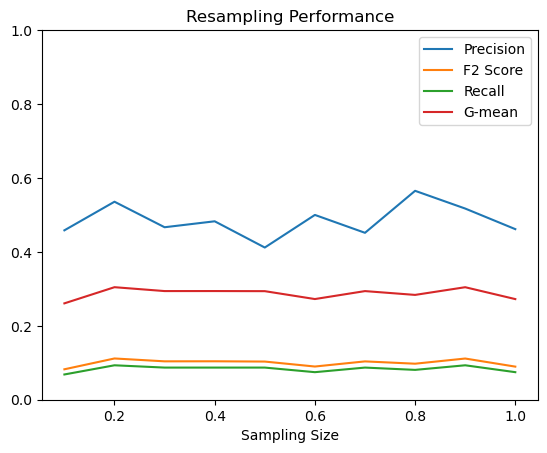

In [76]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, XGBClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2423  134]
 [ 129   32]]
TN: 2423, FP: 134, FN: 129, TP: 32


Precision:  0.1927710843373494
Recall:  0.19875776397515527
F2:  0.19753086419753088
G-Mean:  0.4339836760705841

Sampling Size: 0.2

Confusion Matrix: 
 [[2348  209]
 [ 126   35]]
TN: 2348, FP: 209, FN: 126, TP: 35


Precision:  0.14344262295081966
Recall:  0.21739130434782608
F2:  0.19707207207207206
G-Mean:  0.44679136025294186

Sampling Size: 0.3

Confusion Matrix: 
 [[2318  239]
 [ 120   41]]
TN: 2318, FP: 239, FN: 120, TP: 41


Precision:  0.14642857142857144
Recall:  0.2546583850931677
F2:  0.22186147186147184
G-Mean:  0.4804744984928752

Sampling Size: 0.4

Confusion Matrix: 
 [[2320  237]
 [ 123   38]]
TN: 2320, FP: 237, FN: 123, TP: 38


Precision:  0.13818181818181818
Recall:  0.2360248447204969
F2:  0.20674646354733403
G-Mean:  0.46276178620012537

Sampling Size: 0.5

Confusion Matrix: 
 [[2304  253]
 [ 111   50]]
TN: 2304, FP: 253, FN: 111, TP: 50


Precision:  0.1650165

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.192771,0.197531,0.198758,0.433984,0.1
1,0.143443,0.197072,0.217391,0.446791,0.2
2,0.146429,0.221861,0.254658,0.480474,0.3
3,0.138182,0.206746,0.236025,0.462762,0.4
4,0.165017,0.263992,0.310559,0.528991,0.5
5,0.181818,0.294118,0.347826,0.559952,0.6
6,0.160772,0.261780,0.310559,0.528071,0.7
7,0.150150,0.255885,0.310559,0.525535,0.8


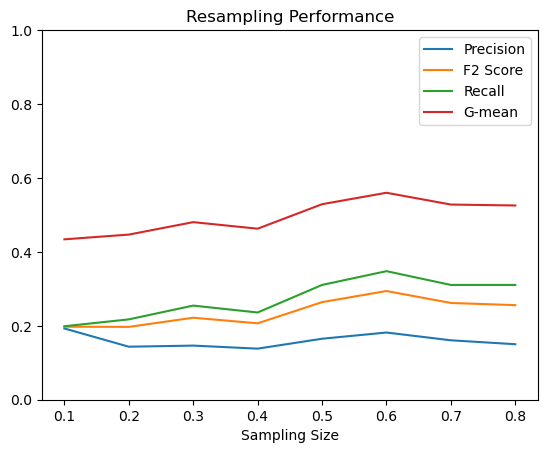

In [77]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, XGBClassifier(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2543   14]
 [ 150   11]]
TN: 2543, FP: 14, FN: 150, TP: 11


Precision:  0.44
Recall:  0.06832298136645963
F2:  0.0822122571001495
G-Mean:  0.2606701012534579

Sampling Size: 2

Confusion Matrix: 
 [[2517   40]
 [ 145   16]]
TN: 2517, FP: 40, FN: 145, TP: 16


Precision:  0.2857142857142857
Recall:  0.09937888198757763
F2:  0.11428571428571427
G-Mean:  0.3127687086968633

Sampling Size: 3

Confusion Matrix: 
 [[2495   62]
 [ 140   21]]
TN: 2495, FP: 62, FN: 140, TP: 21


Precision:  0.25301204819277107
Recall:  0.13043478260869565
F2:  0.14442916093535077
G-Mean:  0.3567521674204774

Sampling Size: 4

Confusion Matrix: 
 [[2466   91]
 [ 133   28]]
TN: 2466, FP: 91, FN: 133, TP: 28


Precision:  0.23529411764705882
Recall:  0.17391304347826086
F2:  0.18348623853211007
G-Mean:  0.4095408711636211

Sampling Size: 5

Confusion Matrix: 
 [[2442  115]
 [ 129   32]]
TN: 2442, FP: 115, FN: 129, TP: 32


Precision:  0.21768707482993196
Recall:  0.19875776

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.440000,0.082212,0.068323,0.260670,1
1,0.285714,0.114286,0.099379,0.312769,2
2,0.253012,0.144429,0.130435,0.356752,3
3,0.235294,0.183486,0.173913,0.409541,4
4,0.217687,0.202276,0.198758,0.435682,5
5,0.200000,0.213675,0.217391,0.453309,6
6,0.206897,0.220049,0.223602,0.459929,7
7,0.197044,0.236128,0.248447,0.482296,8
8,0.200913,0.254925,0.273292,0.504567,9
9,0.185345,0.245434,0.267081,0.497332,10


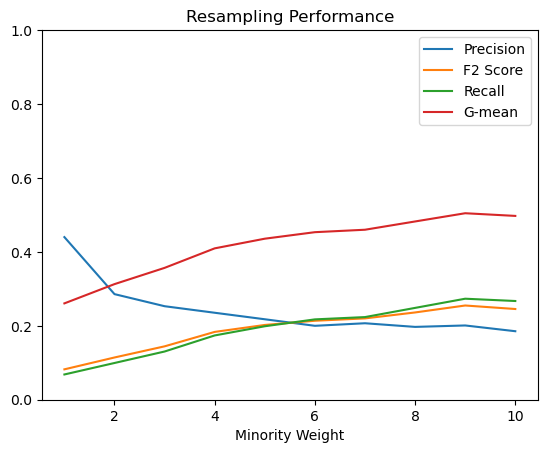

In [78]:
get_performance_weighing('scale', X_train, X_val, y_train, y_val, XGBClassifier)

### Logistic Regression

Sampling Size: 0.1

Confusion Matrix: 
 [[2550    7]
 [ 159    2]]
TN: 2550, FP: 7, FN: 159, TP: 2


Precision:  0.2222222222222222
Recall:  0.012422360248447204
F2:  0.015313935681470138
G-Mean:  0.11130297841883806

Sampling Size: 0.2

Confusion Matrix: 
 [[2492   65]
 [ 149   12]]
TN: 2492, FP: 65, FN: 149, TP: 12


Precision:  0.15584415584415584
Recall:  0.07453416149068323
F2:  0.08321775312066575
G-Mean:  0.2695171093039924

Sampling Size: 0.3

Confusion Matrix: 
 [[2372  185]
 [ 126   35]]
TN: 2372, FP: 185, FN: 126, TP: 35


Precision:  0.1590909090909091
Recall:  0.21739130434782608
F2:  0.20254629629629628
G-Mean:  0.4490689860246937

Sampling Size: 0.4

Confusion Matrix: 
 [[2240  317]
 [ 107   54]]
TN: 2240, FP: 317, FN: 107, TP: 54


Precision:  0.14555256064690028
Recall:  0.33540372670807456
F2:  0.2660098522167488
G-Mean:  0.5420540417803716

Sampling Size: 0.5

Confusion Matrix: 
 [[2093  464]
 [  87   74]]
TN: 2093, FP: 464, FN: 87, TP: 74


Precision:  0.13754646840

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.222222,0.015314,0.012422,0.111303,0.1
1,0.155844,0.083218,0.074534,0.269517,0.2
2,0.159091,0.202546,0.217391,0.449069,0.3
3,0.145553,0.266010,0.335404,0.542054,0.4
4,0.137546,0.313029,0.459627,0.613369,0.5
5,0.127628,0.324427,0.527950,0.638741,0.6
6,0.131714,0.361150,0.639752,0.685469,0.7
7,0.128806,0.367156,0.683230,0.696012,0.8
8,0.124204,0.368852,0.726708,0.701598,0.9
9,0.125000,0.377764,0.763975,0.711848,1.0


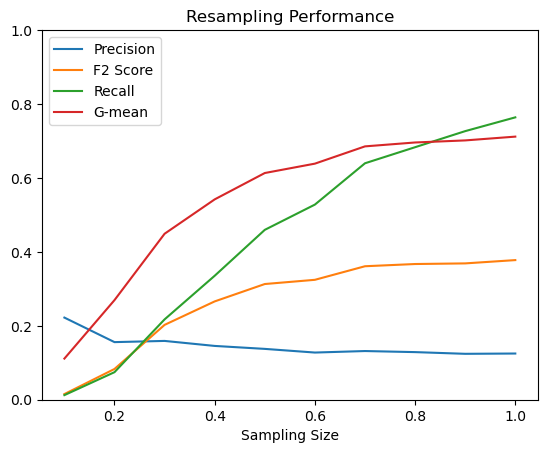

In [79]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, LogisticRegression(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2463   94]
 [ 143   18]]
TN: 2463, FP: 94, FN: 143, TP: 18


Precision:  0.16071428571428573
Recall:  0.11180124223602485
F2:  0.11904761904761905
G-Mean:  0.3281634104299046

Sampling Size: 0.2

Confusion Matrix: 
 [[2116  441]
 [  90   71]]
TN: 2116, FP: 441, FN: 90, TP: 71


Precision:  0.138671875
Recall:  0.4409937888198758
F2:  0.3070934256055363
G-Mean:  0.6040998167821579

Sampling Size: 0.3

Confusion Matrix: 
 [[1850  707]
 [  62   99]]
TN: 1850, FP: 707, FN: 62, TP: 99


Precision:  0.1228287841191067
Recall:  0.6149068322981367
F2:  0.34137931034482766
G-Mean:  0.6669989641712609

Sampling Size: 0.4

Confusion Matrix: 
 [[1722  835]
 [  43  118]]
TN: 1722, FP: 835, FN: 43, TP: 118


Precision:  0.12381951731374606
Recall:  0.7329192546583851
F2:  0.36944270507200994
G-Mean:  0.7025532953315943

Sampling Size: 0.5

Confusion Matrix: 
 [[1633  924]
 [  30  131]]
TN: 1633, FP: 924, FN: 30, TP: 131


Precision:  0.12417061611374408
Reca

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.160714,0.119048,0.111801,0.328163,0.1
1,0.138672,0.307093,0.440994,0.604100,0.2
2,0.122829,0.341379,0.614907,0.666999,0.3
3,0.123820,0.369443,0.732919,0.702553,0.4
4,0.124171,0.385521,0.813665,0.720859,0.5
5,0.126479,0.398738,0.863354,0.734314,0.6
6,0.126872,0.404722,0.894410,0.740114,0.7
7,0.125977,0.403900,0.900621,0.739114,0.8


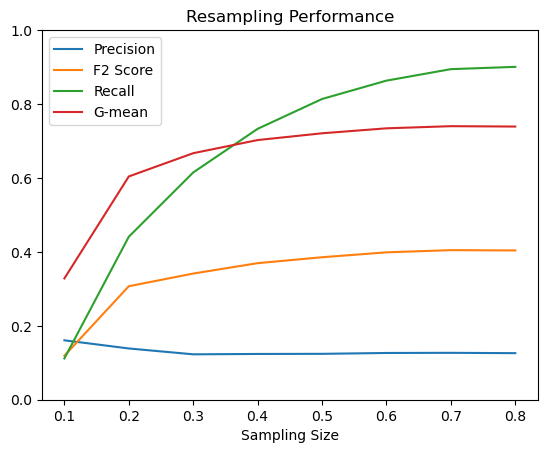

In [80]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, LogisticRegression(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2554    3]
 [ 161    0]]
TN: 2554, FP: 3, FN: 161, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0

Sampling Size: 2

Confusion Matrix: 
 [[2537   20]
 [ 158    3]]
TN: 2537, FP: 20, FN: 158, TP: 3


Precision:  0.13043478260869565
Recall:  0.018633540372670808
F2:  0.022488755622188907
G-Mean:  0.1359698313715265

Sampling Size: 3

Confusion Matrix: 
 [[2513   44]
 [ 156    5]]
TN: 2513, FP: 44, FN: 156, TP: 5


Precision:  0.10204081632653061
Recall:  0.031055900621118012
F2:  0.03607503607503607
G-Mean:  0.1747040385329715

Sampling Size: 4

Confusion Matrix: 
 [[2457  100]
 [ 145   16]]
TN: 2457, FP: 100, FN: 145, TP: 16


Precision:  0.13793103448275862
Recall:  0.09937888198757763
F2:  0.10526315789473685
G-Mean:  0.3090183487568205

Sampling Size: 5

Confusion Matrix: 
 [[2388  169]
 [ 128   33]]
TN: 2388, FP: 169, FN: 128, TP: 33


Precision:  0.16336633663366337
Recall:  0.20496894409937888
F2:  0.19503546099290783
G-Mean:  0.

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.000000,0.000000,0.000000,0.000000,1
1,0.130435,0.022489,0.018634,0.135970,2
2,0.102041,0.036075,0.031056,0.174704,3
3,0.137931,0.105263,0.099379,0.309018,4
4,0.163366,0.195035,0.204969,0.437518,5
5,0.155488,0.262346,0.316770,0.531464,6
6,0.138528,0.289331,0.397516,0.579346,7
7,0.135452,0.326087,0.503106,0.633548,8
8,0.135097,0.356094,0.602484,0.675399,9
9,0.132859,0.376597,0.695652,0.704825,10


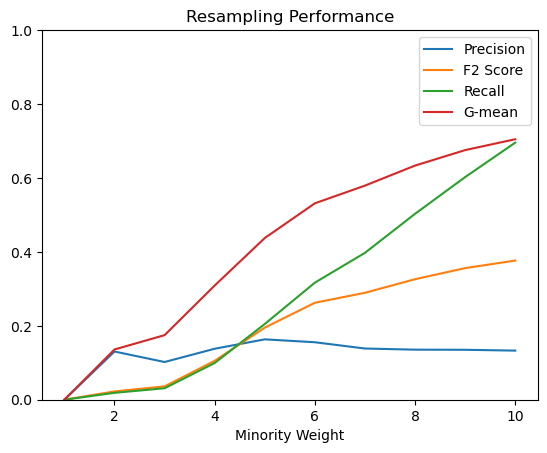

In [81]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, LogisticRegression)

In [82]:
newLR = LogisticRegression(class_weight="balanced", random_state=19)
newLR.fit(X_train, y_train)
y_pred = newLR.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[1524 1033]
 [  12  149]]
TN: 1524, FP: 1033, FN: 12, TP: 149


Precision:  0.1260575296108291
Recall:  0.9254658385093167
F2:  0.4079956188389923
G-Mean:  0.7426895541948388


### Linear SVC

Sampling Size: 0.1

Confusion Matrix: 
 [[2556    1]
 [ 160    1]]
TN: 2556, FP: 1, FN: 160, TP: 1


Precision:  0.5
Recall:  0.006211180124223602
F2:  0.007739938080495355
G-Mean:  0.07879562827593363

Sampling Size: 0.2

Confusion Matrix: 
 [[2509   48]
 [ 152    9]]
TN: 2509, FP: 48, FN: 152, TP: 9


Precision:  0.15789473684210525
Recall:  0.055900621118012424
F2:  0.06419400855920114
G-Mean:  0.23420344733976972

Sampling Size: 0.3

Confusion Matrix: 
 [[2386  171]
 [ 126   35]]
TN: 2386, FP: 171, FN: 126, TP: 35


Precision:  0.16990291262135923
Recall:  0.21739130434782608
F2:  0.2058823529411765
G-Mean:  0.4503922820533753

Sampling Size: 0.4

Confusion Matrix: 
 [[2239  318]
 [ 109   52]]
TN: 2239, FP: 318, FN: 109, TP: 52


Precision:  0.14054054054054055
Recall:  0.32298136645962733
F2:  0.25641025641025644
G-Mean:  0.5318025513833526

Sampling Size: 0.5

Confusion Matrix: 
 [[2084  473]
 [  87   74]]
TN: 2084, FP: 473, FN: 87, TP: 74


Precision:  0.13528336380255943
Recall

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.500000,0.007740,0.006211,0.078796,0.1
1,0.157895,0.064194,0.055901,0.234203,0.2
2,0.169903,0.205882,0.217391,0.450392,0.3
3,0.140541,0.256410,0.322981,0.531803,0.4
4,0.135283,0.310663,0.459627,0.612049,0.5
5,0.128093,0.330579,0.546584,0.646948,0.6
6,0.131677,0.365769,0.658385,0.691668,0.7
7,0.128492,0.373619,0.714286,0.704554,0.8
8,0.126135,0.382263,0.776398,0.716553,0.9
9,0.123552,0.380952,0.795031,0.716040,1.0


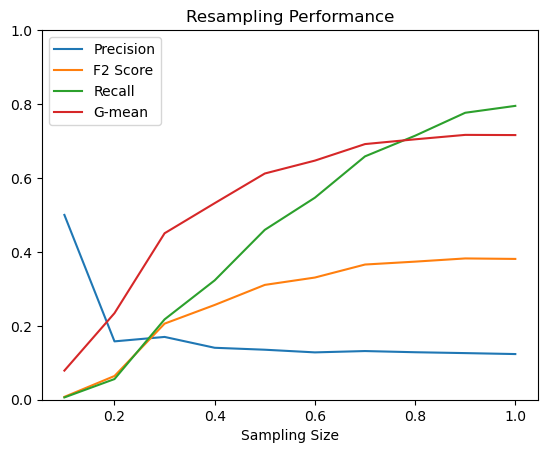

In [83]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, LinearSVC(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2494   63]
 [ 150   11]]
TN: 2494, FP: 63, FN: 150, TP: 11


Precision:  0.14864864864864866
Recall:  0.06832298136645963
F2:  0.07660167130919221
G-Mean:  0.25814651423385004

Sampling Size: 0.2

Confusion Matrix: 
 [[2113  444]
 [  86   75]]
TN: 2113, FP: 444, FN: 86, TP: 75


Precision:  0.14450867052023122
Recall:  0.4658385093167702
F2:  0.3224419604471195
G-Mean:  0.6204432701393564

Sampling Size: 0.3

Confusion Matrix: 
 [[1835  722]
 [  61  100]]
TN: 1835, FP: 722, FN: 61, TP: 100


Precision:  0.12165450121654502
Recall:  0.6211180124223602
F2:  0.34106412005457026
G-Mean:  0.6676359781303781

Sampling Size: 0.4

Confusion Matrix: 
 [[1689  868]
 [  36  125]]
TN: 1689, FP: 868, FN: 36, TP: 125


Precision:  0.12588116817724068
Recall:  0.7763975155279503
F2:  0.38179596823457546
G-Mean:  0.7161294422593389

Sampling Size: 0.5

Confusion Matrix: 
 [[1593  964]
 [  24  137]]
TN: 1593, FP: 964, FN: 24, TP: 137


Precision:  0.12443233424

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.148649,0.076602,0.068323,0.258147,0.1
1,0.144509,0.322442,0.465839,0.620443,0.2
2,0.121655,0.341064,0.621118,0.667636,0.3
3,0.125881,0.381796,0.776398,0.716129,0.4
4,0.124432,0.392550,0.850932,0.728098,0.5
5,0.125654,0.402235,0.894410,0.737510,0.6
6,0.125213,0.404290,0.913043,0.739139,0.7
7,0.125632,0.407104,0.925466,0.741714,0.8


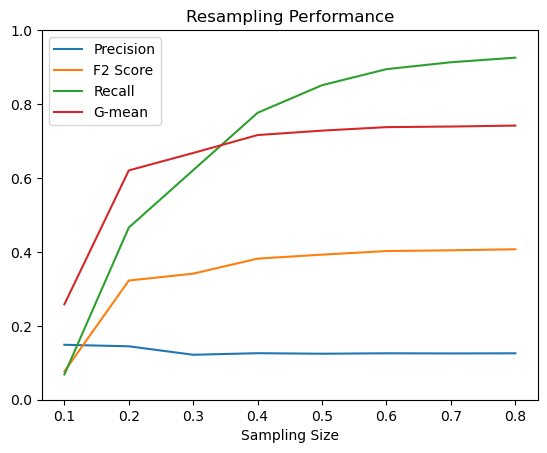

In [84]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, LinearSVC(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2556    1]
 [ 160    1]]
TN: 2556, FP: 1, FN: 160, TP: 1


Precision:  0.5
Recall:  0.006211180124223602
F2:  0.007739938080495355
G-Mean:  0.07879562827593363

Sampling Size: 2

Confusion Matrix: 
 [[2553    4]
 [ 160    1]]
TN: 2553, FP: 4, FN: 160, TP: 1


Precision:  0.2
Recall:  0.006211180124223602
F2:  0.007704160246533127
G-Mean:  0.0787493731335408

Sampling Size: 3

Confusion Matrix: 
 [[2498   59]
 [ 155    6]]
TN: 2498, FP: 59, FN: 155, TP: 6


Precision:  0.09230769230769231
Recall:  0.037267080745341616
F2:  0.04231311706629055
G-Mean:  0.1908066647197413

Sampling Size: 4

Confusion Matrix: 
 [[2500   57]
 [ 155    6]]
TN: 2500, FP: 57, FN: 155, TP: 6


Precision:  0.09523809523809523
Recall:  0.037267080745341616
F2:  0.042432814710042434
G-Mean:  0.19088303320977923

Sampling Size: 5

Confusion Matrix: 
 [[2437  120]
 [ 138   23]]
TN: 2437, FP: 120, FN: 138, TP: 23


Precision:  0.16083916083916083
Recall:  0.14285714285714285
F2

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.500000,0.007740,0.006211,0.078796,1
1,0.200000,0.007704,0.006211,0.078749,2
2,0.092308,0.042313,0.037267,0.190807,3
3,0.095238,0.042433,0.037267,0.190883,4
4,0.160839,0.146125,0.142857,0.368989,5
5,0.142857,0.200893,0.223602,0.452453,6
6,0.150538,0.227519,0.260870,0.486508,7
7,0.156658,0.292113,0.372671,0.570609,8
8,0.147110,0.345679,0.521739,0.649900,9
9,0.140600,0.348473,0.552795,0.659688,10


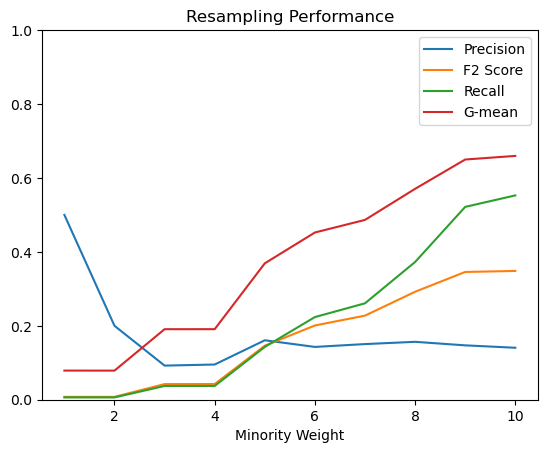

In [85]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, LinearSVC)

In [86]:
newSVC = LinearSVC(class_weight="balanced", random_state=19)
newSVC.fit(X_train, y_train)
y_pred = newSVC.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[1542 1015]
 [  16  145]]
TN: 1542, FP: 1015, FN: 16, TP: 145


Precision:  0.125
Recall:  0.9006211180124224
F2:  0.40188470066518844
G-Mean:  0.7369667362018131


## Random Forest

Sampling Size: 0.1

Confusion Matrix: 
 [[2553    4]
 [ 154    7]]
TN: 2553, FP: 4, FN: 154, TP: 7


Precision:  0.6363636363636364
Recall:  0.043478260869565216
F2:  0.053435114503816786
G-Mean:  0.20835125721358025

Sampling Size: 0.2

Confusion Matrix: 
 [[2549    8]
 [ 152    9]]
TN: 2549, FP: 8, FN: 152, TP: 9


Precision:  0.5294117647058824
Recall:  0.055900621118012424
F2:  0.0680786686838124
G-Mean:  0.23606297194318523

Sampling Size: 0.3

Confusion Matrix: 
 [[2550    7]
 [ 151   10]]
TN: 2550, FP: 7, FN: 151, TP: 10


Precision:  0.5882352941176471
Recall:  0.062111801242236024
F2:  0.07564296520423601
G-Mean:  0.248881025842714

Sampling Size: 0.4

Confusion Matrix: 
 [[2549    8]
 [ 149   12]]
TN: 2549, FP: 8, FN: 149, TP: 12


Precision:  0.6
Recall:  0.07453416149068323
F2:  0.09036144578313253
G-Mean:  0.2725820407942021

Sampling Size: 0.5

Confusion Matrix: 
 [[2546   11]
 [ 153    8]]
TN: 2546, FP: 11, FN: 153, TP: 8


Precision:  0.42105263157894735
Recall:  0.0496

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.636364,0.053435,0.043478,0.208351,0.1
1,0.529412,0.068079,0.055901,0.236063,0.2
2,0.588235,0.075643,0.062112,0.248881,0.3
3,0.600000,0.090361,0.074534,0.272582,0.4
4,0.421053,0.060332,0.049689,0.222431,0.5
5,0.454545,0.075075,0.062112,0.248637,0.6
6,0.428571,0.067669,0.055901,0.235878,0.7
7,0.392857,0.081845,0.068323,0.260516,0.8
8,0.428571,0.089286,0.074534,0.272154,0.9
9,0.428571,0.089286,0.074534,0.272154,1.0


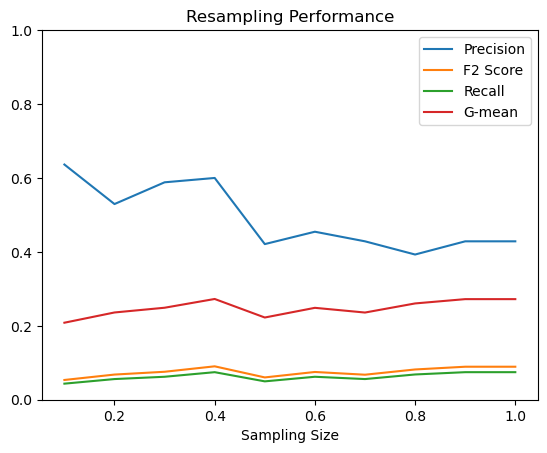

In [87]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, RandomForestClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2501   56]
 [ 140   21]]
TN: 2501, FP: 56, FN: 140, TP: 21


Precision:  0.2727272727272727
Recall:  0.13043478260869565
F2:  0.14563106796116504
G-Mean:  0.3571808703599539

Sampling Size: 0.2

Confusion Matrix: 
 [[2402  155]
 [ 125   36]]
TN: 2402, FP: 155, FN: 125, TP: 36


Precision:  0.18848167539267016
Recall:  0.2236024844720497
F2:  0.2155688622754491
G-Mean:  0.4583101229859424

Sampling Size: 0.3

Confusion Matrix: 
 [[2353  204]
 [ 120   41]]
TN: 2353, FP: 204, FN: 120, TP: 41


Precision:  0.1673469387755102
Recall:  0.2546583850931677
F2:  0.23059617547806524
G-Mean:  0.48408830409866815

Sampling Size: 0.4

Confusion Matrix: 
 [[2332  225]
 [ 116   45]]
TN: 2332, FP: 225, FN: 116, TP: 45


Precision:  0.16666666666666666
Recall:  0.2795031055900621
F2:  0.24617067833698028
G-Mean:  0.5048847207453304

Sampling Size: 0.5

Confusion Matrix: 
 [[2315  242]
 [ 112   49]]
TN: 2315, FP: 242, FN: 112, TP: 49


Precision:  0.168384879725

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.272727,0.145631,0.130435,0.357181,0.1
1,0.188482,0.215569,0.223602,0.458310,0.2
2,0.167347,0.230596,0.254658,0.484088,0.3
3,0.166667,0.246171,0.279503,0.504885,0.4
4,0.168385,0.262032,0.304348,0.524923,0.5
5,0.171141,0.270701,0.316770,0.534949,0.6
6,0.169279,0.280374,0.335404,0.548310,0.7
7,0.144543,0.249237,0.304348,0.519452,0.8


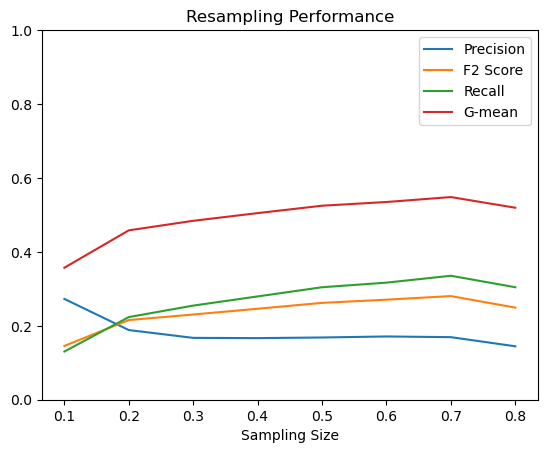

In [88]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, RandomForestClassifier(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2556    1]
 [ 155    6]]
TN: 2556, FP: 1, FN: 155, TP: 6


Precision:  0.8571428571428571
Recall:  0.037267080745341616
F2:  0.04608294930875577
G-Mean:  0.19300908323805555

Sampling Size: 2

Confusion Matrix: 
 [[2557    0]
 [ 155    6]]
TN: 2557, FP: 0, FN: 155, TP: 6


Precision:  1.0
Recall:  0.037267080745341616
F2:  0.046153846153846156
G-Mean:  0.19304683562633604

Sampling Size: 3

Confusion Matrix: 
 [[2555    2]
 [ 153    8]]
TN: 2555, FP: 2, FN: 153, TP: 8


Precision:  0.8
Recall:  0.049689440993788817
F2:  0.061162079510703356
G-Mean:  0.22282409109563753

Sampling Size: 4

Confusion Matrix: 
 [[2556    1]
 [ 155    6]]
TN: 2556, FP: 1, FN: 155, TP: 6


Precision:  0.8571428571428571
Recall:  0.037267080745341616
F2:  0.04608294930875577
G-Mean:  0.19300908323805555

Sampling Size: 5

Confusion Matrix: 
 [[2556    1]
 [ 153    8]]
TN: 2556, FP: 1, FN: 153, TP: 8


Precision:  0.8888888888888888
Recall:  0.049689440993788817
F2:  0.0

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.857143,0.046083,0.037267,0.193009,1
1,1.000000,0.046154,0.037267,0.193047,2
2,0.800000,0.061162,0.049689,0.222824,3
3,0.857143,0.046083,0.037267,0.193009,4
4,0.888889,0.061256,0.049689,0.222868,5
5,0.833333,0.038462,0.031056,0.176192,6
6,0.571429,0.030722,0.024845,0.157530,7
7,0.875000,0.053681,0.043478,0.208474,8
8,0.875000,0.053681,0.043478,0.208474,9
9,0.625000,0.038344,0.031056,0.176123,10


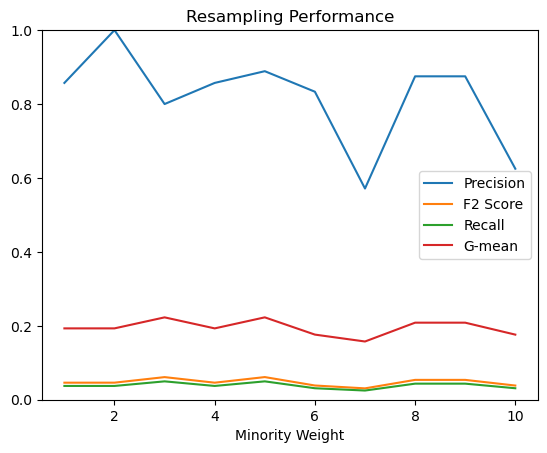

In [89]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, RandomForestClassifier)

In [90]:
newrf = RandomForestClassifier(class_weight="balanced", random_state=19)
newrf.fit(X_train, y_train)
y_pred = newrf.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[2555    2]
 [ 155    6]]
TN: 2555, FP: 2, FN: 155, TP: 6


Precision:  0.75
Recall:  0.037267080745341616
F2:  0.04601226993865031
G-Mean:  0.192971323464


## AdaBoost Classifier

Sampling Size: 0.1

Confusion Matrix: 
 [[2532   25]
 [ 159    2]]
TN: 2532, FP: 25, FN: 159, TP: 2


Precision:  0.07407407407407407
Recall:  0.012422360248447204
F2:  0.014903129657228016
G-Mean:  0.11090944868325085

Sampling Size: 0.2

Confusion Matrix: 
 [[2521   36]
 [ 159    2]]
TN: 2521, FP: 36, FN: 159, TP: 2


Precision:  0.05263157894736842
Recall:  0.012422360248447204
F2:  0.014662756598240468
G-Mean:  0.11066826940493761

Sampling Size: 0.3

Confusion Matrix: 
 [[2521   36]
 [ 155    6]]
TN: 2521, FP: 36, FN: 155, TP: 6


Precision:  0.14285714285714285
Recall:  0.037267080745341616
F2:  0.043731778425655975
G-Mean:  0.19168306539507227

Sampling Size: 0.4

Confusion Matrix: 
 [[2481   76]
 [ 144   17]]
TN: 2481, FP: 76, FN: 144, TP: 17


Precision:  0.1827956989247312
Recall:  0.10559006211180125
F2:  0.11533242876526459
G-Mean:  0.32008073879969534

Sampling Size: 0.5

Confusion Matrix: 
 [[2444  113]
 [ 142   19]]
TN: 2444, FP: 113, FN: 142, TP: 19


Precision:  0.1439

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.074074,0.014903,0.012422,0.110909,0.1
1,0.052632,0.014663,0.012422,0.110668,0.2
2,0.142857,0.043732,0.037267,0.191683,0.3
3,0.182796,0.115332,0.105590,0.320081,0.4
4,0.143939,0.122423,0.118012,0.335853,0.5
5,0.155844,0.150376,0.149068,0.376151,0.6
6,0.119266,0.150812,0.161491,0.386477,0.7
7,0.135965,0.177752,0.192547,0.421559,0.8
8,0.147465,0.185830,0.198758,0.429392,0.9
9,0.159259,0.235230,0.267081,0.493326,1.0


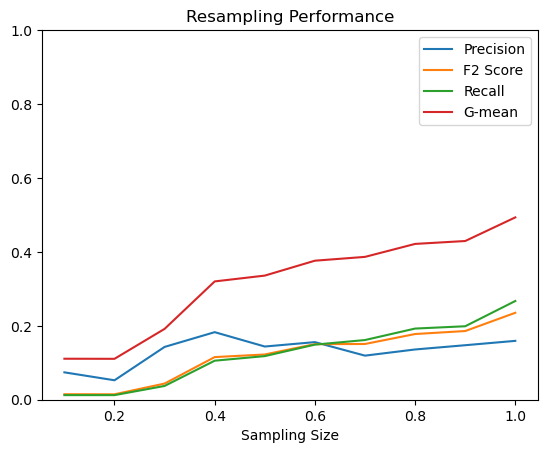

In [91]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, AdaBoostClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2481   76]
 [ 151   10]]
TN: 2481, FP: 76, FN: 151, TP: 10


Precision:  0.11627906976744186
Recall:  0.062111801242236024
F2:  0.06849315068493152
G-Mean:  0.24549072026376645

Sampling Size: 0.2

Confusion Matrix: 
 [[2316  241]
 [ 118   43]]
TN: 2316, FP: 241, FN: 118, TP: 43


Precision:  0.15140845070422534
Recall:  0.2670807453416149
F2:  0.23168103448275862
G-Mean:  0.4918415373404469

Sampling Size: 0.3

Confusion Matrix: 
 [[2235  322]
 [ 109   52]]
TN: 2235, FP: 322, FN: 109, TP: 52


Precision:  0.13903743315508021
Recall:  0.32298136645962733
F2:  0.2554027504911591
G-Mean:  0.5313273032532294

Sampling Size: 0.4

Confusion Matrix: 
 [[2150  407]
 [  99   62]]
TN: 2150, FP: 407, FN: 99, TP: 62


Precision:  0.13219616204690832
Recall:  0.38509316770186336
F2:  0.27852650494159925
G-Mean:  0.5690321083248785

Sampling Size: 0.5

Confusion Matrix: 
 [[2047  510]
 [  82   79]]
TN: 2047, FP: 510, FN: 82, TP: 79


Precision:  0.134125636

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.116279,0.068493,0.062112,0.245491,0.1
1,0.151408,0.231681,0.267081,0.491842,0.2
2,0.139037,0.255403,0.322981,0.531327,0.3
3,0.132196,0.278527,0.385093,0.569032,0.4
4,0.134126,0.320357,0.490683,0.626750,0.5
5,0.137371,0.352006,0.577640,0.667616,0.6
6,0.122807,0.328520,0.565217,0.649259,0.7
7,0.125490,0.340667,0.596273,0.663527,0.8


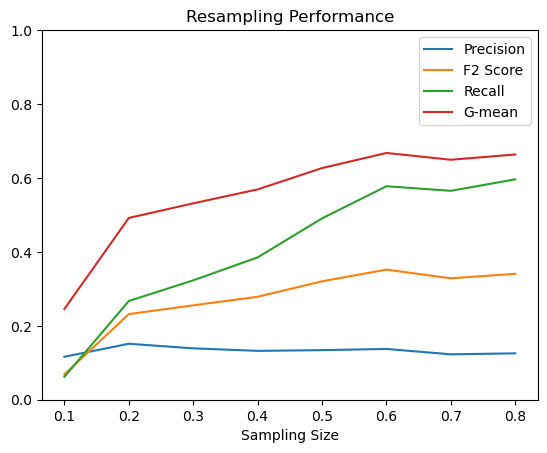

In [92]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, AdaBoostClassifier(random_state=19))

##  Using Class Weighing on Voting Classifier

In [93]:
vc_class = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19))],
    voting='hard'
)

In [94]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class)

Confusion Matrix: 
 [[1558  999]
 [  16  145]]
TN: 1558, FP: 999, FN: 16, TP: 145


Precision:  0.12674825174825174
Recall:  0.9006211180124224
F2:  0.4054809843400448
G-Mean:  0.7407803023439352


(0.12674825174825174,
 0.9006211180124224,
 0.4054809843400448,
 0.7407803023439352)

In [95]:
vc_class_2 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19)),
               ('RF',RandomForestClassifier(random_state=19)),
               ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [96]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class_2)

Confusion Matrix: 
 [[1857  700]
 [  54  107]]
TN: 1857, FP: 700, FN: 54, TP: 107


Precision:  0.1325898389095415
Recall:  0.6645962732919255
F2:  0.3687112336319779
G-Mean:  0.6947355758398631


(0.1325898389095415,
 0.6645962732919255,
 0.3687112336319779,
 0.6947355758398631)

In [97]:
vc_class_3 = VotingClassifier(
    estimators=[('XGB',XGBClassifier(random_state=19)),
               ('RF',RandomForestClassifier(random_state=19)),
               ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [98]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class_3)

Confusion Matrix: 
 [[2214  343]
 [ 100   61]]
TN: 2214, FP: 343, FN: 100, TP: 61


Precision:  0.15099009900990099
Recall:  0.37888198757763975
F2:  0.29103053435114506
G-Mean:  0.5727636179985716


(0.15099009900990099,
 0.37888198757763975,
 0.29103053435114506,
 0.5727636179985716)

# Hyper parameter tuning for XGB

In [99]:
# hyperopt - used for Bayesian hyperparameter tuning
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt.pyll import scope

# for timing
from time import time
from tqdm import tqdm

import os
import pickle

In [100]:
def evaluate_F2(X_train, X_val, y_train, y_val, classifier, sampling):

    ennObj = EditedNearestNeighbours(n_neighbors=5)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smoteENN, y_res_smoteENN)

    # predict on validation set
    y_preds = clf.predict(X_val)

    # Evaluate results
    F2 = fbeta_score(y_val, y_preds, beta=2)
    return F2

In [101]:
def hyperopt(param_space, num_eval, classifier, use_scaling = False):
    start = time()
    def objective_function(params):
        clf = classifier(**params)

        if use_scaling: clf = scale_classifier(clf)
        score = evaluate_F2(X_train, X_val, y_train, y_val, clf, 0.8)

        return {'loss': -score, 'status': STATUS_OK}
    trials = Trials()
    best_param = fmin(objective_function, param_space, algo=tpe.suggest, max_evals=num_eval,
                      trials=trials)
    loss = [x['result']['loss'] for x in trials.trials]
    best_param_values = best_param
    #print(loss)
    return trials, best_param_values

In [102]:
# XGB Bayesian hyperopt

num_eval = 100

XGB_param_hyperopt = {
    'booster': hp.choice('booster', ['dart','gbtree']),
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'subsample': hp.uniform('subsample', 0.1, 0.5),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 0.7),
    'colsample_bynode': hp.uniform('colsample_bynode', 0.1, 0.8),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.1, 0.4),
    'gamma': hp.uniform('gamma', 1, 20),
    'min_child_weight': hp.uniform('min_child_weight', 1.5, 2.5),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
    'reg_lambda': hp.uniform('reg_lambda', 1, 6),
    'reg_alpha':hp.uniform('reg_alpha', 0.02, 0.1),
    'scale_pos_weight':hp.uniform('scale_pos_weight', 1, 10)
}

if not os.path.exists('TuningFS'): os.mkdir('TuningFS')

def save_file(path, data):
    output = open(path, 'wb')
    pickle.dump(data, output)
    output.close()

def load_file(path):
    pkl_file = open(path, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

In [103]:
load = True #put load = True if you don't want to load the whole thing again
if(load == False):
    XGB_hyperopt = hyperopt(XGB_param_hyperopt,  num_eval, XGBClassifier)
    save_file('TuningFS/XGB_hyperopt.pkl', XGB_hyperopt)
else:
    try:
        XGB_hyperopt = load_file('TuningFS/XGB_hyperopt.pkl')
    except Exception as e:
        print(e)

In [104]:
XGB_hyperopt[1]

{'booster': 0,
 'colsample_bylevel': 0.19151572699658645,
 'colsample_bynode': 0.6329283822987078,
 'colsample_bytree': 0.3865791309646543,
 'gamma': 16.60120812043403,
 'learning_rate': 0.1866255601330448,
 'max_depth': 8.0,
 'min_child_weight': 1.749492711643751,
 'n_estimators': 540.0,
 'reg_alpha': 0.08277604446149361,
 'reg_lambda': 4.451367764866161,
 'scale_pos_weight': 7.919235255732057,
 'subsample': 0.2076764026764466}

In [105]:
trials = XGB_hyperopt[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [106]:
bayesTrialsData.sort_values(by='loss')

,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
90,-0.409658,[0],[0.19151572699658645],[0.6329283822987078],[0.3865791309646543],[16.60120812043403],[0.1866255601330448],[8.0],[1.749492711643751],[540.0],[0.08277604446149361],[4.451367764866161],[7.919235255732057],[0.2076764026764466]
93,-0.409471,[0],[0.22494925286321146],[0.7998908338400603],[0.4419487324977333],[18.17861591290695],[0.2396906973553982],[6.0],[1.9647438437649858],[480.0],[0.08672409792698169],[5.367882913066752],[5.136981614174474],[0.15301475420936214]
80,-0.406758,[1],[0.24820165646923426],[0.6976895049491914],[0.37634183049919484],[6.086361603124004],[0.1635963493997701],[8.0],[1.7614214422417103],[360.0],[0.0917472132546593],[5.009072631144652],[7.912016181041552],[0.363495327553889]
31,-0.406699,[0],[0.37820072856019105],[0.4234785140235286],[0.2861548752067796],[3.120912105721594],[0.14643261185206102],[20.0],[1.6187680470422117],[280.0],[0.088426110696496],[1.788656068447556],[4.37356914836289],[0.26570664736101146]
57,-0.406351,[1],[0.3010509344095089],[0.5196034479251982],[0.20184563344422413],[11.226228856462573],[0.14693548660536573],[13.0],[1.5842318126186468],[180.0],[0.05727313343734695],[4.9927953639932205],[8.47534891508078],[0.3543100244504304]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,-0.314685,[0],[0.27361042727782703],[0.5970071961052026],[0.5032384428462213],[8.878296073349254],[0.377369975401263],[8.0],[1.6522746236418113],[380.0],[0.06146049195876007],[2.2586232331479534],[2.9619205124506593],[0.4714336548674028]
60,-0.309675,[1],[0.3495939681791183],[0.1440202052520897],[0.32656458074817635],[15.16710443603097],[0.11030422688114279],[2.0],[1.6599979491915686],[80.0],[0.047929222199682375],[5.766070407865156],[1.009913770695424],[0.3541854755011202]
87,-0.309320,[1],[0.20795329564482362],[0.28496955822207504],[0.33715715759060333],[5.666177337523772],[0.05020764285327747],[4.0],[1.6195817142081859],[80.0],[0.07670341359275183],[3.904267344745553],[1.9710664680057985],[0.2932248158868228]
15,-0.284043,[0],[0.2861178614592421],[0.17674891740181597],[0.6037906143926959],[8.72532339401416],[0.2323726087685452],[14.0],[1.9140536670191193],[320.0],[0.09663500287155227],[3.160478490901445],[1.0834513406053539],[0.4528979846592037]


In [107]:
xg_chosen = XGB_hyperopt[1]

xgboost_model_1   =   XGBClassifier(booster=['dart','gbtree'][xg_chosen['booster']],
                                  colsample_bytree=xg_chosen['colsample_bytree'],
                                  colsample_bynode = xg_chosen['colsample_bynode'],
                                  colsample_bylevel = xg_chosen['colsample_bylevel'],
                                  n_estimators = int(xg_chosen['n_estimators']),
                                  reg_alpha = xg_chosen['reg_alpha'],
                                  reg_lambda = xg_chosen['reg_lambda'],
                                  max_depth=int(xg_chosen['max_depth']),
                                  subsample = xg_chosen['subsample'],
                                  gamma = xg_chosen['gamma'],
                                  min_child_weight = xg_chosen['min_child_weight'],
                                  scale_pos_weight = xg_chosen['scale_pos_weight'],
                                  learning_rate=xg_chosen['learning_rate'],
                                  random_state=19)

In [108]:
xgboost_model_1

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=0.19151572699658645,
              colsample_bynode=0.6329283822987078,
              colsample_bytree=0.3865791309646543, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=16.60120812043403, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1866255601330448, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1.749492711643751, missing=nan,
              monotone_constraints=None, n_estimators=540, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=19, ...)

## Second Round of Tuning for XGB

In [109]:
# parameters = xg_chosen.keys()

In [110]:
# sorted_results = bayesTrialsData.sort_values('loss')
# sorted_results

In [111]:
# sorted_results.reset_index(inplace=True)

In [112]:
# sorted_results

In [113]:
# sorted_results.drop('index',axis=1,inplace=True)

In [114]:
# top_10 = sorted_results.iloc[0:10]
# top_10

In [115]:
# for i in parameters:
#     minimum = top_10[i].min()
#     maximum = top_10[i].max()
#     print(i,'Min:',minimum,'Max:',maximum)

In [116]:
# # XGB Bayesian hyperopt2

# num_eval_2 = 100


# XGB_param_hyperopt2 = {
#     'booster': hp.choice('booster', ['gbtree']),
#     'learning_rate': hp.uniform('learning_rate', top_10['learning_rate'].min()[0], top_10['learning_rate'].max()[0]),
#     'max_depth': scope.int(hp.quniform('max_depth', top_10['max_depth'].min()[0], top_10['max_depth'].max()[0], 1)),
#     'subsample': hp.uniform('subsample', top_10['subsample'].min()[0], top_10['subsample'].max()[0]),
#     'colsample_bytree': hp.uniform('colsample_bytree', top_10['colsample_bytree'].min()[0], top_10['colsample_bytree'].max()[0]),
#     'colsample_bynode': hp.uniform('colsample_bynode', top_10['colsample_bynode'].min()[0], top_10['colsample_bynode'].max()[0]),
#     'colsample_bylevel': hp.uniform('colsample_bylevel', top_10['colsample_bylevel'].min()[0], top_10['colsample_bylevel'].max()[0]),
#     'gamma': hp.uniform('gamma', top_10['gamma'].min()[0], top_10['gamma'].max()[0]),
#     'min_child_weight': hp.uniform('min_child_weight', top_10['min_child_weight'].min()[0], top_10['min_child_weight'].max()[0]),
#     'n_estimators': scope.int(hp.quniform('n_estimators', top_10['n_estimators'].min()[0], top_10['n_estimators'].max()[0], 20)),
#     'reg_lambda': hp.uniform('reg_lambda', top_10['reg_lambda'].min()[0], top_10['reg_lambda'].max()[0]),
#     'reg_alpha':hp.uniform('reg_alpha', top_10['reg_alpha'].min()[0], top_10['reg_alpha'].max()[0]),
#     'scale_pos_weight':hp.uniform('scale_pos_weight', top_10['scale_pos_weight'].min()[0], top_10['scale_pos_weight'].max()[0])
# }

# if not os.path.exists('TuningFS'): os.mkdir('TuningFS')

# def save_file(path, data):
#     output = open(path, 'wb')
#     pickle.dump(data, output)
#     output.close()

# def load_file(path):
#     pkl_file = open(path, 'rb')
#     data = pickle.load(pkl_file)
#     pkl_file.close()
#     return data

In [117]:
# load = False
# if(load == False):
#     XGB_hyperopt2 = hyperopt(XGB_param_hyperopt2,  num_eval_2, XGBClassifier)
#     save_file('TuningFS/XGB_hyperopt2.pkl', XGB_hyperopt2)
# else:
#     try:
#         XGB_hyperopt2 = load_file('TuningFS/XGB_hyperopt2.pkl')
#     except Exception as e:
#         print(e)

In [118]:
# xg_chosen2 = XGB_hyperopt2[1]
# xg_chosen2

In [119]:
# trials = XGB_hyperopt2[0].trials
# import json

# record = []
# losses = []
# for trial in trials:
#     loss = trial["result"]["loss"]
#     values = trial["misc"]['vals']
#     #print(loss,values)
#     losses.append(loss)
#     record.append(values)

# bayesTrialsData2 = pd.DataFrame(record)

# #if you have time try to make this part of the code more "pandas-like" - I just did an iteration for this
# # I left the values as list.

# bayesTrialsData2.insert(0, 'loss', losses)

In [120]:
# bayesTrialsData2.sort_values(by='loss')

In [121]:
# xg_chosen2 = XGB_hyperopt2[1]

# xgboost_model_2   =   XGBClassifier(booster=['gbtree'][xg_chosen2['booster']],
#                                   colsample_bytree=xg_chosen2['colsample_bytree'],
#                                   colsample_bynode = xg_chosen2['colsample_bynode'],
#                                   colsample_bylevel = xg_chosen2['colsample_bylevel'],
#                                   n_estimators = int(xg_chosen2['n_estimators']),
#                                   reg_alpha = xg_chosen2['reg_alpha'],
#                                   reg_lambda = xg_chosen2['reg_lambda'],
#                                   max_depth=int(xg_chosen2['max_depth']),
#                                   subsample = xg_chosen2['subsample'],
#                                   gamma = xg_chosen2['gamma'],
#                                   min_child_weight = xg_chosen2['min_child_weight'],
#                                   scale_pos_weight = xg_chosen2['scale_pos_weight'],
#                                   learning_rate=xg_chosen2['learning_rate'],
#                                   random_state=19)

In [122]:
# xgboost_model_2.get_xgb_params()

In [123]:
# xgboost_model_2

### Model without tuning

In [124]:
train_model(X_train, X_test, y_train, y_test, XGBClassifier(random_state=19))

Confusion Matrix: 
 [[1407   14]
 [  85    4]]
TN: 1407, FP: 14, FN: 85, TP: 4


Precision:  0.2222222222222222
Recall:  0.0449438202247191
F2:  0.05347593582887701
G-Mean:  0.2109526581163354


### Model without tuning but with imbalance handling

In [125]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, XGBClassifier(random_state=19))

Confusion Matrix: 
 [[1257  164]
 [  55   34]]
TN: 1257, FP: 164, FN: 55, TP: 34


Precision:  0.1717171717171717
Recall:  0.38202247191011235
F2:  0.30685920577617326
G-Mean:  0.5813197191717885


(0.1717171717171717,
 0.38202247191011235,
 0.30685920577617326,
 0.5813197191717885)

### 1st Round Tuning

In [126]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, xgboost_model_1)

Confusion Matrix: 
 [[835 586]
 [  7  82]]
TN: 835, FP: 586, FN: 7, TP: 82


Precision:  0.12275449101796407
Recall:  0.9213483146067416
F2:  0.400390625
G-Mean:  0.7357971844331324


(0.12275449101796407, 0.9213483146067416, 0.400390625, 0.7357971844331324)

### 2nd Round Tuning

In [127]:
# train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, xgboost_model_2)

### Feature Importance

In [128]:
feature_weight = xgboost_model_1.feature_importances_

In [129]:
weight_df = pd.DataFrame(feature_weight,index = x_var, columns=['weights'])

In [130]:
weight_df.sort_values('weights', ascending=False)

,weights
Fault,0.143404
VehicleCategory_Sedan,0.121347
BasePolicy_Liability,0.118831
BasePolicy_All Perils,0.053649
VehiclePrice,0.045581
Make,0.031298
DayOfWeek_Friday,0.026118
VehicleCategory_Sport,0.025715
MonthClaimed,0.024601
WeekOfMonthClaimed_3,0.023026


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

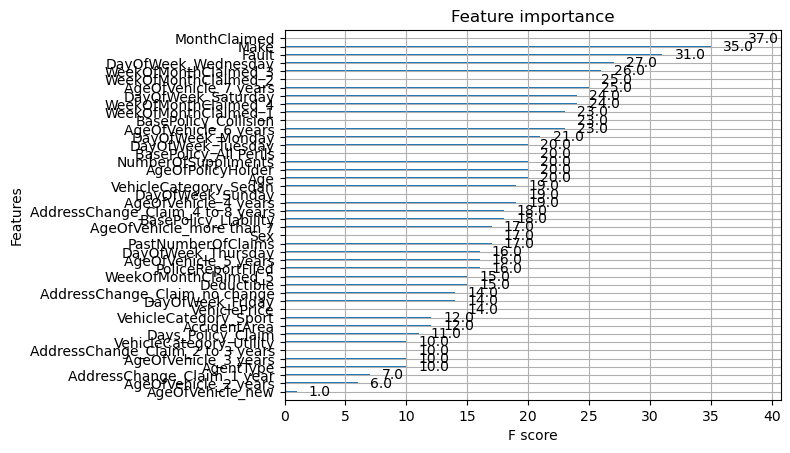

In [131]:
from xgboost import plot_importance
plot_importance(xgboost_model_1)

## Hyper Parameter Tuning for LR

In [132]:
num_eval = 100

LR_param_hyperopt = {
            'warm_start' : hp.choice('warm_start', [True, False]),
            'fit_intercept' : hp.choice('fit_intercept', [True, False]),
            'tol' : hp.uniform('tol', 0.00001, 0.0001),
            'C' : hp.uniform('C', 0.05, 3),
            'solver' : hp.choice('solver', ['lbfgs','newton-cg','liblinear','sag', 'saga']),
            'max_iter' : hp.choice('max_iter', range(100,1000)),
            'multi_class' : 'auto',
            'class_weight' : 'balanced',
}

In [133]:
load = True
if(load == False):
    LR_hyperopt1 = hyperopt(LR_param_hyperopt,  num_eval, LogisticRegression)
    save_file('TuningFS/LR_hyperopt1.pkl', LR_hyperopt1)
else:
    try:
        LR_hyperopt1 = load_file('TuningFS/LR_hyperopt1.pkl')
    except Exception as e:
        print(e)

In [134]:
LR_hyperopt1[1]

{'C': 0.38483951559484364,
 'fit_intercept': 1,
 'max_iter': 625,
 'solver': 1,
 'tol': 2.497446462286831e-05,
 'warm_start': 1}

In [135]:
trials = LR_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [136]:
bayesTrialsData.sort_values(by='loss')

,loss,C,fit_intercept,max_iter,solver,tol,warm_start
97,-0.400341,[0.38483951559484364],[1],[625],[1],[2.497446462286831e-05],[1]
65,-0.399885,[2.6559538990039635],[1],[210],[0],[6.236074039057156e-05],[1]
79,-0.399885,[2.612077812216334],[1],[794],[1],[3.439277567033789e-05],[1]
51,-0.399885,[2.660035668728218],[1],[657],[2],[7.479801425650578e-05],[0]
54,-0.399885,[2.6859535146476747],[1],[554],[2],[5.9776994981940255e-05],[0]
...,...,...,...,...,...,...,...
58,-0.396736,[0.20182318875810634],[1],[92],[2],[4.6956840086325634e-05],[0]
7,-0.396011,[0.6231375564399231],[0],[89],[1],[8.73713316338657e-05],[0]
83,-0.394511,[0.796726984396104],[1],[551],[1],[1.8431451081218683e-05],[0]
99,-0.392539,[0.0929797854433157],[1],[210],[1],[3.331055191009184e-05],[1]


In [137]:
lr_chosen = LR_hyperopt1[1]

LR_model_1   =   LogisticRegression(warm_start=[True, False][lr_chosen['warm_start']],
                                    fit_intercept=[True, False][lr_chosen['fit_intercept']],
                                    tol= lr_chosen['tol'],
                                    C=lr_chosen['C'],
                                    solver=['lbfgs','newton-cg','liblinear','sag', 'saga'][lr_chosen['solver']],
                                    max_iter=lr_chosen['max_iter'],
                                    multi_class='auto',
                                    class_weight='balanced',
                                    random_state=19)

In [138]:
LR_model_1

LogisticRegression(C=0.38483951559484364, class_weight='balanced',
                   fit_intercept=False, max_iter=625, random_state=19,
                   solver='newton-cg', tol=2.497446462286831e-05)

### Model without tuning

In [139]:
train_model(X_train, X_test, y_train, y_test, LogisticRegression(random_state=19))

Confusion Matrix: 
 [[1417    4]
 [  89    0]]
TN: 1417, FP: 4, FN: 89, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


### Model without tuning but with imbalance handling

In [140]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LogisticRegression(random_state=19))

Confusion Matrix: 
 [[840 581]
 [  7  82]]
TN: 840, FP: 581, FN: 7, TP: 82


Precision:  0.12368024132730016
Recall:  0.9213483146067416
F2:  0.40235525024533864
G-Mean:  0.7379968819697605


(0.12368024132730016,
 0.9213483146067416,
 0.40235525024533864,
 0.7379968819697605)

### Model with tuning

In [141]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LR_model_1)

Confusion Matrix: 
 [[861 560]
 [  9  80]]
TN: 861, FP: 560, FN: 9, TP: 80


Precision:  0.125
Recall:  0.898876404494382
F2:  0.4016064257028113
G-Mean:  0.7379968819697605


(0.125, 0.898876404494382, 0.4016064257028113, 0.7379968819697605)

In [216]:
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = np.abs(classifier.coef_.ravel())
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

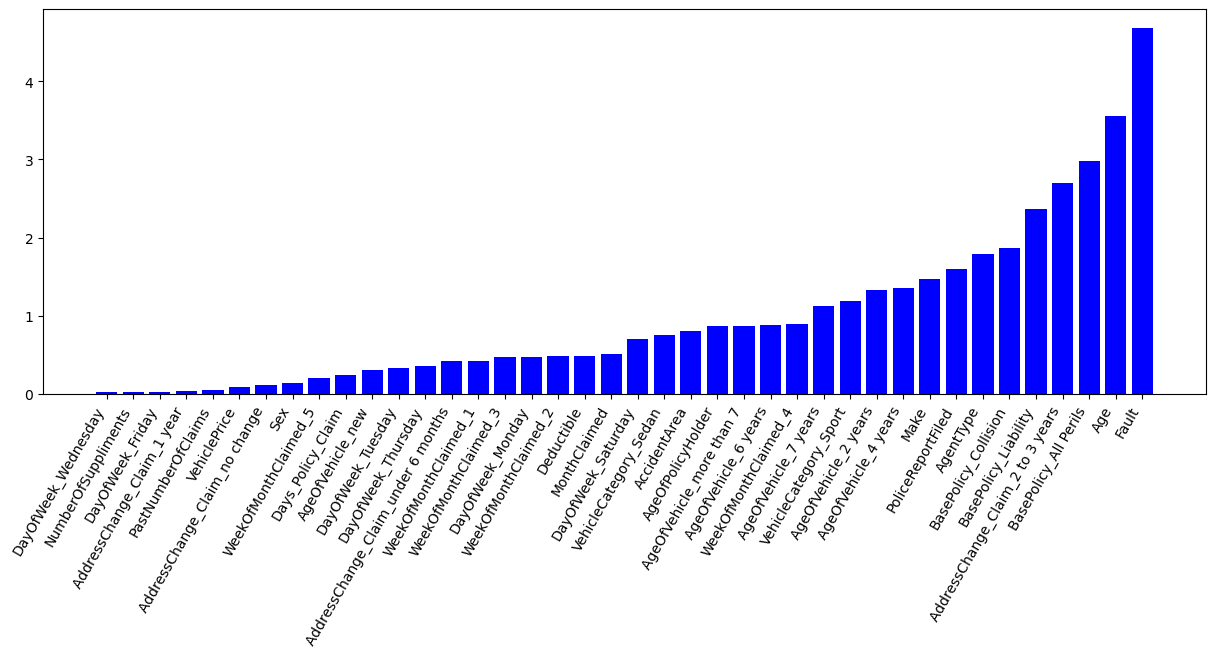

In [217]:
plot_coefficients(LR_model_1, SVC_model_1.feature_names_in_)

In [213]:
LR_model_1.coef_

array([[ 0.49198735,  3.5599192 , -0.05306296, -0.86650927, -0.14027889,
         0.51384782, -0.80649656, -0.25048574,  0.09207401, -1.47265367,
        -1.78733798, -0.02892801, -1.60187033, -4.68600874, -1.32687594,
        -0.6739209 ,  1.35764782,  0.54961632,  0.89087614,  1.12642862,
         0.86654707, -0.30339145,  2.97800532,  1.87165565, -2.3627333 ,
         0.42597324,  0.4873194 ,  0.47078835,  0.89696695,  0.20587973,
         0.03186434,  0.47697198,  0.70643511,  0.59524395,  0.36126124,
         0.34019768, -0.02504663,  0.03798921,  2.69754315, -0.55287834,
        -0.12099551,  0.42526917,  0.76024828,  1.19625136,  0.53042803]])

## Hyper Parameter Tuning for SVC

In [142]:
num_eval = 100

SVC_param_hyperopt = {
            'fit_intercept' : hp.choice('fit_intercept', [True, False]),
            'tol' : hp.uniform('tol', 0.00001, 0.0001),
            'C' : hp.uniform('C', 0.05, 3),
            'max_iter' : hp.choice('max_iter', range(100,1000)),
            'class_weight' : 'balanced',
                }

In [143]:
load = True
if(load == False):
    SVC_hyperopt1 = hyperopt(SVC_param_hyperopt,  num_eval, LinearSVC)
    save_file('TuningFS/SVC_hyperopt1.pkl', SVC_hyperopt1)
else:
    try:
        SVC_hyperopt1 = load_file('TuningFS/SVC_hyperopt1.pkl')
    except Exception as e:
        print(e)

In [144]:
SVC_hyperopt1[1]

{'C': 5.515706706142934,
 'fit_intercept': 1,
 'max_iter': 601,
 'tol': 7.414036053743112e-05}

In [145]:
trials = SVC_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [146]:
bayesTrialsData.sort_values(by='loss')

,loss,C,fit_intercept,max_iter,tol
39,-0.410017,[5.515706706142934],[1],[601],[7.414036053743112e-05]
72,-0.408602,[6.258250438898663],[1],[152],[8.290783714676018e-05]
22,-0.407880,[3.527686645913314],[1],[186],[6.18701944168837e-05]
91,-0.407549,[3.5353929441112677],[1],[527],[4.977774463316323e-05]
34,-0.407104,[4.903719847801875],[1],[601],[7.540272042432287e-05]
...,...,...,...,...,...
2,-0.339398,[7.081437358334119],[0],[705],[8.504587118151156e-05]
76,-0.334101,[6.818908160888204],[1],[334],[4.7490282882961475e-05]
40,-0.317737,[7.970914652542083],[1],[15],[4.968886635273788e-05]
30,-0.304878,[9.702629523492087],[1],[661],[6.099759089173338e-05]


In [147]:
SVC_chosen = SVC_hyperopt1[1]

SVC_model_1   =   LinearSVC(fit_intercept=[True, False][SVC_chosen['fit_intercept']],
                                    tol= SVC_chosen['tol'],
                                    C=SVC_chosen['C'],
                                    max_iter=SVC_chosen['max_iter'],
                                    class_weight='balanced',
                                    random_state=19)

In [148]:
SVC_model_1

LinearSVC(C=5.515706706142934, class_weight='balanced', fit_intercept=False,
          max_iter=601, random_state=19, tol=7.414036053743112e-05)

### Model Without Tuning

In [149]:
train_model(X_train, X_test, y_train, y_test, LinearSVC(random_state=19))

Confusion Matrix: 
 [[1421    0]
 [  88    1]]
TN: 1421, FP: 0, FN: 88, TP: 1


Precision:  1.0
Recall:  0.011235955056179775
F2:  0.014005602240896357
G-Mean:  0.105999788000636


### Model without tuning but with imbalance handling

In [150]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LinearSVC(random_state=19))

Confusion Matrix: 
 [[830 591]
 [  6  83]]
TN: 830, FP: 591, FN: 6, TP: 83


Precision:  0.12314540059347182
Recall:  0.9325842696629213
F2:  0.4029126213592233
G-Mean:  0.7380504512277681


(0.12314540059347182,
 0.9325842696629213,
 0.4029126213592233,
 0.7380504512277681)

### Model With Tuning

In [151]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,SVC_model_1)

Confusion Matrix: 
 [[865 556]
 [  7  82]]
TN: 865, FP: 556, FN: 7, TP: 82


Precision:  0.12852664576802508
Recall:  0.9213483146067416
F2:  0.4124748490945674
G-Mean:  0.7488984601959779


(0.12852664576802508,
 0.9213483146067416,
 0.4124748490945674,
 0.7488984601959779)

In [200]:
coef = SVC_model_1.coef_.ravel()
for i in range(0,len(coef)):
    print(coef[i])
               

0.059734937266863984
1.6847087739577107
-0.03447509164463017
-0.3679182044783998
0.026955461319659507
5.0355112801697794
-0.21844499069317108
-0.23034669719035605
-0.01350728420509776
-0.5589631214995663
-1.144512293615689
0.018888911164211077
-0.6869431487055853
-1.5399471073298585
-0.7468177849050135
-0.2400714441943783
0.4599656165233063
0.2848683124611733
0.34940158635387025
0.46193401067083684
0.33224798316038767
0.05393745102519722
1.0488211077021294
0.7163786615523168
-0.8097340381590984
0.1519690130991712
0.1771299791261069
0.20106670247034267
0.31887786806599966
0.10642216833377678
0.060320096668133635
0.15831664041787108
0.29671697964182897
0.20157955796127563
0.11073414109735923
0.09457556226516273
0.03322275304374821
-0.13160154276351665
0.6760885024865173
-0.33478189032729855
-0.25816663253729727
1.0039272942370148
0.23207022097233546
0.49714122226371427
0.22625428785935797


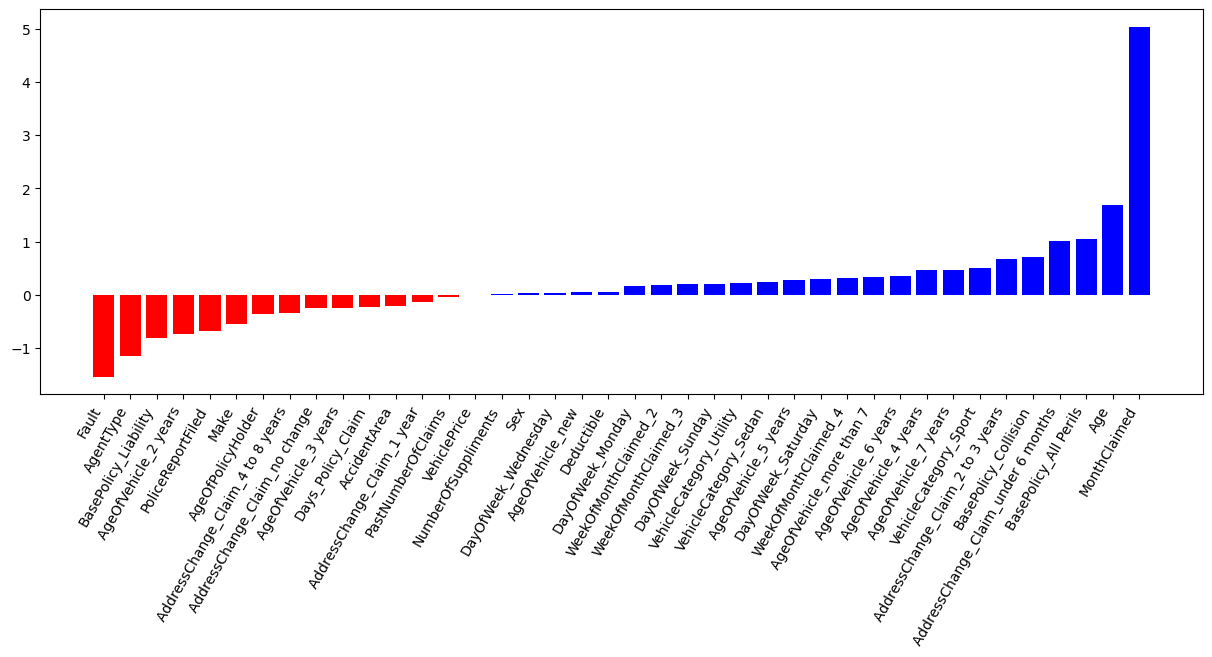

In [199]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

plot_coefficients(SVC_model_1, SVC_model_1.feature_names_in_)

In [201]:
ordinal_features

['AgeOfPolicyHolder',
 'PastNumberOfClaims',
 'VehiclePrice',
 'NumberOfSuppliments',
 'Days_Policy_Claim']

In [202]:
final_df.describe()

,Deductible,Age,PastNumberOfClaims,AgeOfPolicyHolder,Sex,MonthClaimed,AccidentArea,Days_Policy_Claim,VehiclePrice,Make,...,DayOfWeek_Tuesday,DayOfWeek_Wednesday,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility
count,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,...,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000
mean,0.269685,0.385943,1.460066,3.995563,0.839735,0.083658,0.897616,1.991192,1.213576,0.173373,...,0.149801,0.139603,0.010993,0.018940,0.040795,0.929007,0.000265,0.629801,0.344901,0.025298
std,0.110978,0.192336,1.129267,1.213232,0.366864,0.005164,0.303163,0.127077,1.775353,0.069666,...,0.356888,0.346586,0.104275,0.136319,0.197821,0.256822,0.016274,0.482874,0.475352,0.157034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.074040,0.000000,0.000000,0.000000,0.000066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.234375,1.000000,3.000000,1.000000,0.080596,1.000000,2.000000,0.000000,0.155894,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.359375,1.000000,4.000000,1.000000,0.084172,1.000000,2.000000,0.000000,0.164371,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.250000,0.515625,3.000000,5.000000,1.000000,0.088543,1.000000,2.000000,1.000000,0.254106,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,3.000000,7.000000,1.000000,0.091126,1.000000,2.000000,5.000000,0.254106,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Random Forest Tuning

In [152]:
num_eval = 100

RF_param_hyperopt = {
    'warm_start' : hp.choice('warm_start', [True, False]),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'bootstrap': True,
    'max_features': hp.choice('max_features', ["sqrt", "log2", None]),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'max_samples': scope.int(hp.quniform('max_samples', 1, 20, 1)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 20, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
    'class_weight':'balanced'
}

In [153]:
load = True
if(load == False):
    RF_hyperopt1 = hyperopt(RF_param_hyperopt,  num_eval, RandomForestClassifier)
    save_file('TuningFS/RF_hyperopt1.pkl', RF_hyperopt1)
else:
    try:
        RF_hyperopt1 = load_file('TuningFS/RF_hyperopt1.pkl')
    except Exception as e:
        print(e)

In [154]:
RF_hyperopt1[1]

{'criterion': 0,
 'max_depth': 20.0,
 'max_features': 2,
 'max_samples': 20.0,
 'min_samples_leaf': 1.0,
 'min_samples_split': 7.0,
 'n_estimators': 420.0,
 'warm_start': 1}

In [155]:
trials = RF_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [156]:
bayesTrialsData.sort_values(by='loss')

,loss,criterion,max_depth,max_features,max_samples,min_samples_leaf,min_samples_split,n_estimators,warm_start
81,-0.357878,[0],[20.0],[2],[20.0],[1.0],[7.0],[420.0],[1]
72,-0.355058,[0],[15.0],[2],[15.0],[1.0],[6.0],[380.0],[1]
83,-0.349668,[1],[9.0],[2],[20.0],[2.0],[10.0],[400.0],[1]
75,-0.347698,[0],[10.0],[2],[16.0],[1.0],[6.0],[340.0],[1]
76,-0.344394,[0],[20.0],[2],[18.0],[1.0],[7.0],[340.0],[1]
...,...,...,...,...,...,...,...,...,...
60,-0.000000,[0],[9.0],[1],[6.0],[9.0],[5.0],[240.0],[1]
10,-0.000000,[0],[18.0],[0],[6.0],[17.0],[7.0],[180.0],[1]
13,-0.000000,[1],[13.0],[1],[7.0],[12.0],[19.0],[520.0],[1]
91,-0.000000,[1],[17.0],[2],[18.0],[10.0],[8.0],[360.0],[0]


In [157]:
rf_chosen = RF_hyperopt1[1]


rf_model_1   =   RandomForestClassifier(warm_start=[True, False][rf_chosen['warm_start']],
                                  criterion=["gini", "entropy"][rf_chosen['criterion']],
                                  bootstrap = True,
                                  max_features = ["sqrt", "log2", None][rf_chosen['max_features']],
                                  max_depth = int(rf_chosen['max_depth']),
                                  max_samples = int(rf_chosen['max_samples']),
                                  min_samples_split = int(rf_chosen['min_samples_split']),
                                  min_samples_leaf=int(rf_chosen['min_samples_leaf']),
                                  n_estimators = int(rf_chosen['n_estimators']),
                                  class_weight = 'balanced',
                                  random_state=19)

In [158]:
rf_model_1

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=None,
                       max_samples=20, min_samples_split=7, n_estimators=420,
                       random_state=19)

### Model without tuning

In [159]:
train_model(X_train, X_test, y_train, y_test, RandomForestClassifier(random_state=19))

Confusion Matrix: 
 [[1421    0]
 [  87    2]]
TN: 1421, FP: 0, FN: 87, TP: 2


Precision:  1.0
Recall:  0.02247191011235955
F2:  0.02793296089385475
G-Mean:  0.14990633779917228


### Model without tuning but with imbalance handling

In [160]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,RandomForestClassifier(random_state=19))

Confusion Matrix: 
 [[1252  169]
 [  59   30]]
TN: 1252, FP: 169, FN: 59, TP: 30


Precision:  0.1507537688442211
Recall:  0.33707865168539325
F2:  0.27027027027027023
G-Mean:  0.5449676835837858


(0.1507537688442211,
 0.33707865168539325,
 0.27027027027027023,
 0.5449676835837858)

### Model with tuning 

In [161]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,rf_model_1)

Confusion Matrix: 
 [[804 617]
 [ 14  75]]
TN: 804, FP: 617, FN: 14, TP: 75


Precision:  0.10838150289017341
Recall:  0.8426966292134831
F2:  0.357824427480916
G-Mean:  0.6905046599073196


(0.10838150289017341,
 0.8426966292134831,
 0.357824427480916,
 0.6905046599073196)

In [204]:
feature_weight_rf = rf_model_1.feature_importances_

In [205]:
weight_df_rf = pd.DataFrame(feature_weight_rf,index = x_var, columns=['weights'])

In [206]:
weight_df_rf.sort_values('weights', ascending=False)

,weights
BasePolicy_Liability,1.207973e-01
Fault,1.182077e-01
VehicleCategory_Sedan,6.805591e-02
VehicleCategory_Sport,6.696066e-02
MonthClaimed,6.681765e-02
BasePolicy_All Perils,6.652337e-02
Make,5.725560e-02
Age,5.530049e-02
WeekOfMonthClaimed_2,2.272618e-02
DayOfWeek_Monday,2.206663e-02


In [203]:
rf_model_1.feature_importances_

array([4.33318683e-03, 5.53004912e-02, 2.08528177e-02, 1.69574042e-02,
       6.74704265e-03, 6.68176526e-02, 1.75561221e-02, 1.17578461e-03,
       2.07714377e-02, 5.72555976e-02, 0.00000000e+00, 2.13047565e-02,
       5.25034271e-04, 1.18207723e-01, 0.00000000e+00, 0.00000000e+00,
       1.31340704e-03, 3.48544085e-03, 8.30033849e-03, 2.16737916e-02,
       1.24622403e-02, 2.17760148e-18, 6.65233740e-02, 1.22844736e-02,
       1.20797277e-01, 1.70006178e-02, 2.27261772e-02, 1.94145531e-02,
       1.74551087e-02, 7.91952558e-03, 1.63114573e-02, 2.20666334e-02,
       1.37095278e-02, 1.40852639e-02, 1.15949924e-02, 1.35578859e-02,
       2.03117774e-02, 9.79475648e-04, 1.64996240e-03, 1.73820836e-03,
       7.86244925e-03, 0.00000000e+00, 6.80559099e-02, 6.69606619e-02,
       1.95441885e-03])

## AdaBoost

In [162]:
num_eval = 100

ADA_param_hyperopt = {
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
}

In [163]:
load = True
if(load == False):
    ADA_hyperopt1 = hyperopt(ADA_param_hyperopt,  num_eval, AdaBoostClassifier)
    save_file('TuningFS/ADA_hyperopt1.pkl', ADA_hyperopt1)
else:
    try:
        ADA_hyperopt1 = load_file('TuningFS/ADA_hyperopt1.pkl')
    except Exception as e:
        print(e)

In [164]:
ADA_hyperopt1[1]

{'learning_rate': 0.2052718535140969, 'n_estimators': 60.0}

In [165]:
trials = ADA_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [166]:
bayesTrialsData.sort_values(by='loss')

,loss,learning_rate,n_estimators
51,-0.390149,[0.2052718535140969],[60.0]
26,-0.389538,[0.22222673465497988],[60.0]
90,-0.388216,[0.196414061791444],[60.0]
20,-0.387305,[0.1300363427565348],[60.0]
70,-0.386696,[0.07659150577538429],[120.0]
...,...,...,...
59,-0.297619,[0.4653623992219313],[300.0]
17,-0.295154,[0.40026932352184014],[420.0]
10,-0.293321,[0.4044873534565836],[440.0]
0,-0.283019,[0.4257717452698156],[520.0]


In [167]:
ada_chosen = ADA_hyperopt1[1]


ada_model_1   =   AdaBoostClassifier(learning_rate=ada_chosen['learning_rate'],
                                    n_estimators = int(ada_chosen['n_estimators']),
                                    random_state=19)

In [168]:
ada_model_1

AdaBoostClassifier(learning_rate=0.2052718535140969, n_estimators=60,
                   random_state=19)

## Model without tuning 

In [169]:
train_model(X_train, X_test, y_train, y_test, AdaBoostClassifier(random_state=19))

Confusion Matrix: 
 [[1413    8]
 [  85    4]]
TN: 1413, FP: 8, FN: 85, TP: 4


Precision:  0.3333333333333333
Recall:  0.0449438202247191
F2:  0.05434782608695652
G-Mean:  0.21140197206119882


## Model without tuning but with imbalance handling

In [170]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,AdaBoostClassifier(random_state=19))

Confusion Matrix: 
 [[1044  377]
 [  32   57]]
TN: 1044, FP: 377, FN: 32, TP: 57


Precision:  0.1313364055299539
Recall:  0.6404494382022472
F2:  0.36075949367088606
G-Mean:  0.6859550139245151


(0.1313364055299539,
 0.6404494382022472,
 0.36075949367088606,
 0.6859550139245151)

# Model with tuning 

In [171]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,ada_model_1)

Confusion Matrix: 
 [[840 581]
 [ 10  79]]
TN: 840, FP: 581, FN: 10, TP: 79


Precision:  0.11969696969696969
Recall:  0.8876404494382022
F2:  0.3887795275590551
G-Mean:  0.7243711522212669


(0.11969696969696969,
 0.8876404494382022,
 0.3887795275590551,
 0.7243711522212669)

In [208]:
feature_weight_ada = ada_model_1.feature_importances_

In [209]:
weight_df_ada = pd.DataFrame(feature_weight_ada,index = x_var, columns=['weights'])

In [210]:
weight_df_ada.sort_values('weights', ascending=False)

,weights
Fault,0.183333
BasePolicy_Liability,0.150000
BasePolicy_All Perils,0.083333
Make,0.083333
MonthClaimed,0.083333
AddressChange_Claim_2 to 3 years,0.050000
DayOfWeek_Wednesday,0.050000
DayOfWeek_Friday,0.050000
WeekOfMonthClaimed_4,0.033333
AgeOfVehicle_more than 7,0.033333


# Voting Classifier with tuned models

### Model Without Tuning

In [172]:
vc1 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19)),
               ('RF',RandomForestClassifier(random_state=19)),
               ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [173]:
train_model(X_train, X_test, y_train, y_test, vc1)

Confusion Matrix: 
 [[1421    0]
 [  89    0]]
TN: 1421, FP: 0, FN: 89, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


### Model without tuning but with imbalance handling

In [174]:
vc2 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19)),
                ('RF',RandomForestClassifier(random_state=19)),
                ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [175]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,vc2)

Confusion Matrix: 
 [[1019  402]
 [  25   64]]
TN: 1019, FP: 402, FN: 25, TP: 64


Precision:  0.13733905579399142
Recall:  0.7191011235955056
F2:  0.389294403892944
G-Mean:  0.7181001818534215


(0.13733905579399142,
 0.7191011235955056,
 0.389294403892944,
 0.7181001818534215)

### Model with Tuning

In [176]:
vc3 = VotingClassifier(
    estimators=[('XGB',xgboost_model_1),
                ('LR',LR_model_1),
                ('LinearSVC', SVC_model_1),
                ('RF',rf_model_1),
                ('Ada',ada_model_1)],                
    voting='hard'
)

In [177]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,vc3)

Confusion Matrix: 
 [[822 599]
 [  6  83]]
TN: 822, FP: 599, FN: 6, TP: 83


Precision:  0.1217008797653959
Recall:  0.9325842696629213
F2:  0.39980732177263967
G-Mean:  0.7344849692576367


(0.1217008797653959,
 0.9325842696629213,
 0.39980732177263967,
 0.7344849692576367)

In [178]:
vc3

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster='dart',
                                            callbacks=None,
                                            colsample_bylevel=0.19151572699658645,
                                            colsample_bynode=0.6329283822987078,
                                            colsample_bytree=0.3865791309646543,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=16.60120812043403,
                                            gpu_id=None, grow_policy=None,
                                            imp...
                              LinearSVC(C=5.515706706142934,
                                        class_weight='balanced',
                                        fit_intercept=False, max_iter=601,
                                        random_state=19,
                                        tol=7.414036053743112e-05)),
                             ('RF',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=20,
                                                     max_features=None,
                                                     max_samples=20,
                                                     min_samples_split=7,
                                                     n_estimators=420,
                                                     random_state=19)),
                             ('Ada',
                              AdaBoostClassifier(learning_rate=0.2052718535140969,
                                                 n_estimators=60,
                                                 random_state=19))])